In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("results_raw_outside.csv")

In [3]:
modelnames = ["kNN", "Linear", "3 Layer FC", "4 Layer FC", "5 Layer FC", "1-Channel CNN", "2-Channel CNN", "3-Channel CNN", "4-Channel CNN", "1-Channel CNN", "2-Channel CNN (non)", "3-Channel CNN (non)", "4-Channel CNN (non)"]

In [4]:
raw_data["q0_error"] = np.rad2deg(raw_data.true_q0 - raw_data.pred_q0)
raw_data["q3_error"] = np.rad2deg(raw_data.true_q3 - raw_data.pred_q3)
raw_data["abs_q0_error"] = np.abs(raw_data.q0_error)
raw_data["abs_q3_error"] = np.abs(raw_data.q3_error)
raw_data["error"] = 0.5*(raw_data.abs_q0_error + raw_data.abs_q3_error)
raw_data["norm_error"] = np.sqrt(raw_data.q0_error**2 + raw_data.q3_error**2)

In [5]:
tabledata = pd.pivot_table(raw_data, index='model_id', values=["error", "abs_q0_error", "abs_q3_error"], aggfunc="mean") 

In [6]:
tabledata

,abs_q0_error,abs_q3_error,error
model_id,,,
0,10.542764,15.248095,12.895430
1,13.480072,12.623110,13.051591
2,8.008186,9.004173,8.506179
3,8.142520,9.338240,8.740380
4,8.743766,9.857375,9.300571
5,6.668837,9.554775,8.111806
6,5.299748,7.533474,6.416611
7,4.286055,6.856842,5.571449
8,3.709631,6.323806,5.016719


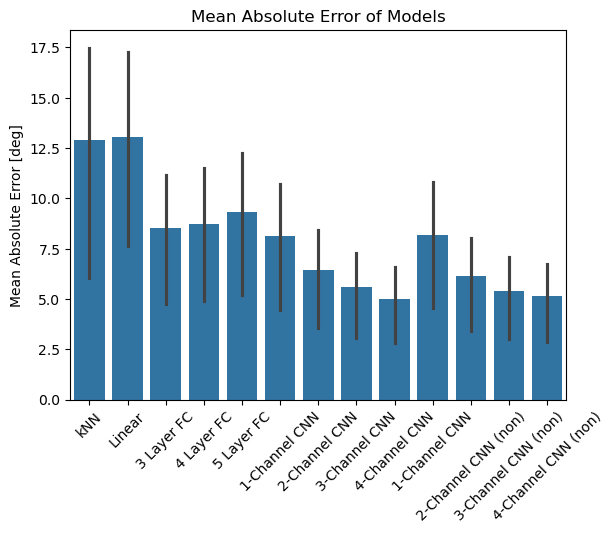

In [7]:
ax = sns.barplot(data=raw_data, x="model_id", y="error", errorbar=("pi", 50))
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
plt.title("Mean Absolute Error of Models")
plt.gca().xaxis.set_major_formatter(lambda x,_: modelnames[int(x)])

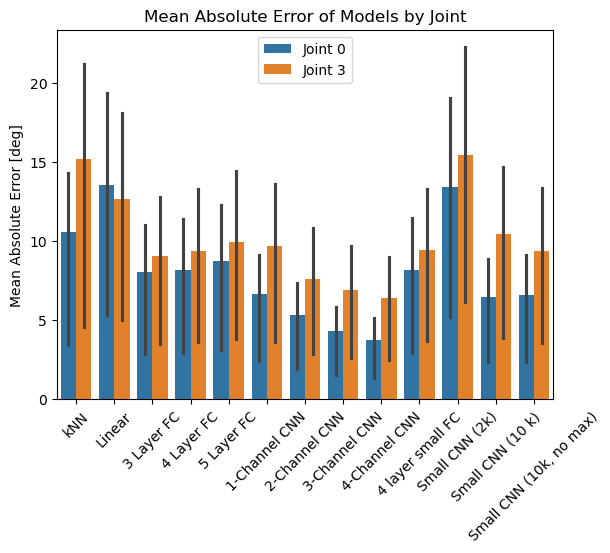

In [25]:
error_longform = raw_data.rename(columns={"abs_q0_error": "Joint 0", "abs_q3_error": "Joint 3"}).melt(id_vars="model_id", value_vars=["Joint 0", "Joint 3"])
ax = sns.barplot(data=error_longform, x="model_id", y="value", hue="variable", errorbar=("pi",50))#("ci", 99))
plt.xticks(rotation=45)
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
plt.title("Mean Absolute Error of Models by Joint")
plt.gca().xaxis.set_major_formatter(lambda x,_: modelnames[int(x)])
L=plt.legend()
L.get_texts()[0] = "Joint 0"
L.get_texts()[1] = "Joint 3"

(0.0, 15.9)

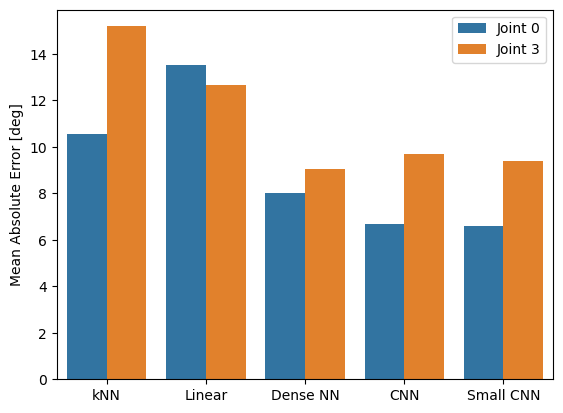

In [26]:
# for presentation
present = [0,1,2,5, 12]
presentnames = ["kNN", "Linear", "Dense NN", "CNN", "Small CNN"]
ax = sns.barplot(data=error_longform.loc[error_longform.model_id.isin(present)], x="model_id", y="value", hue="variable", errorbar=None)#("pi", 50))
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
#plt.title("Mean Absolute Error of Models per Joint")
plt.gca().xaxis.set_major_formatter(lambda _,pos: presentnames[int(pos)])
plt.legend()
plt.ylim(0,15.9)
#plt.gcf().set_dpi(500)

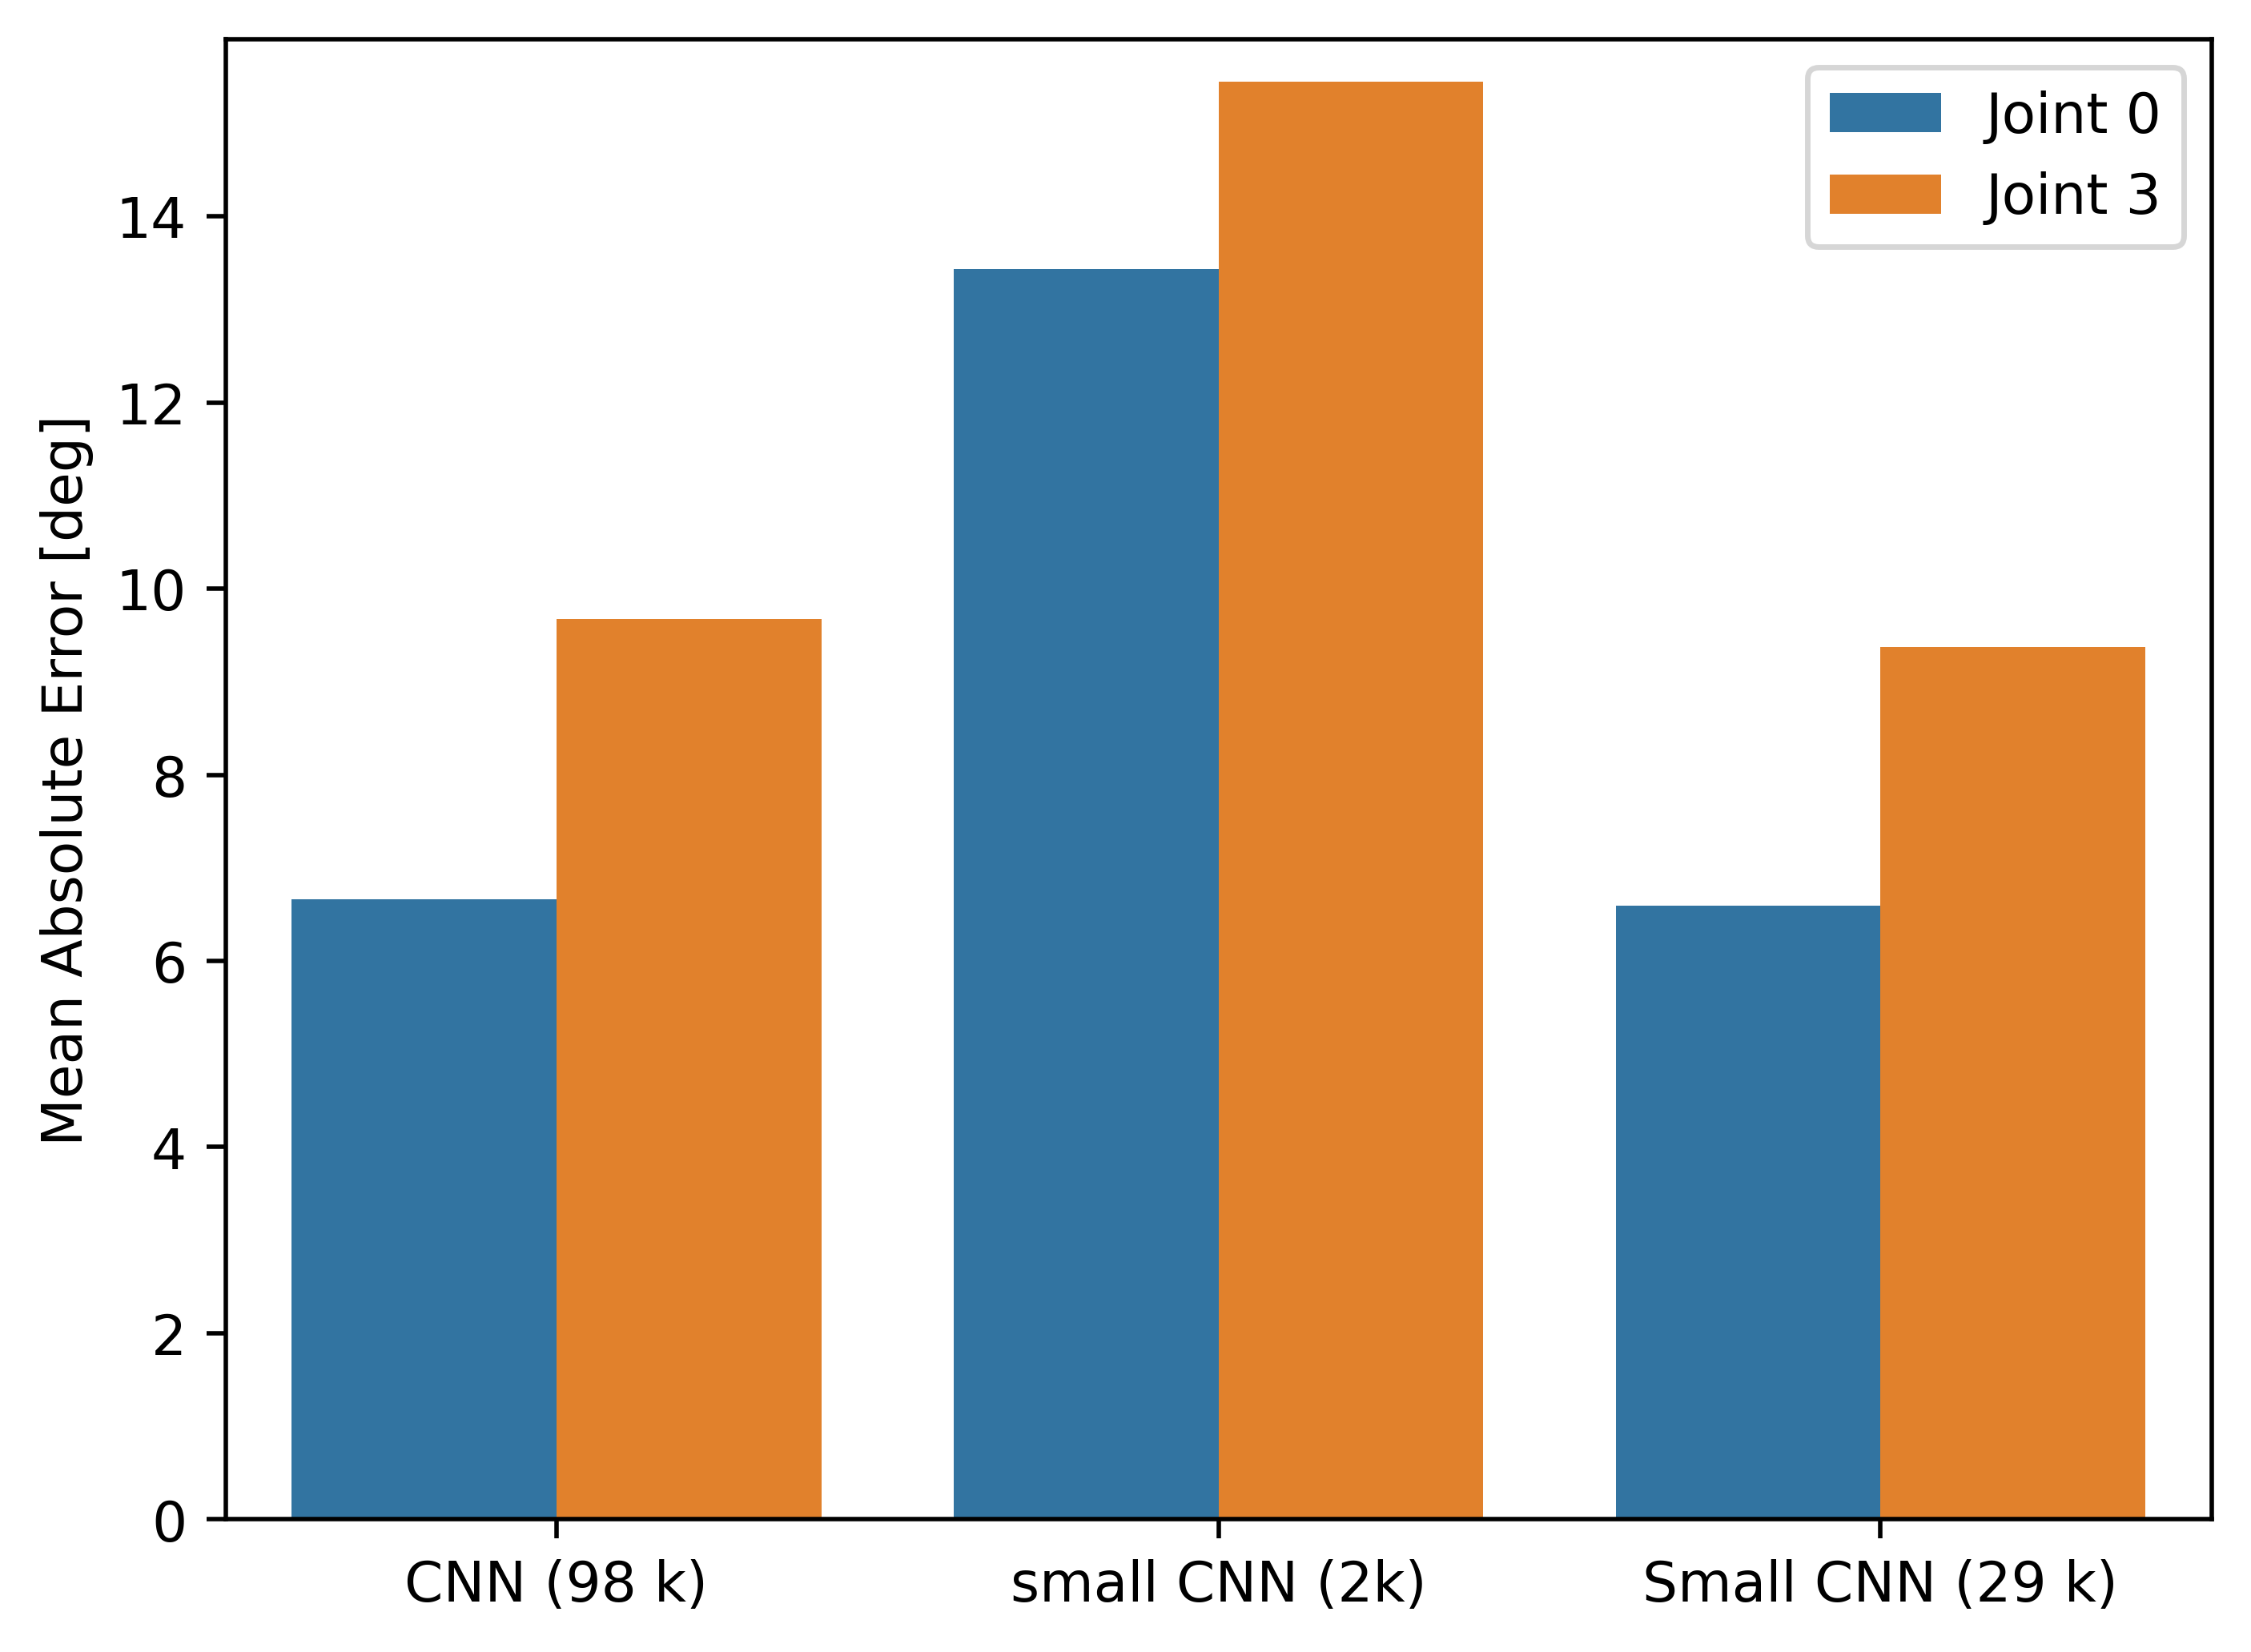

In [28]:
# for presentation
present = [5, 10, 12]
presentnames = ["CNN (98 k)", "small CNN (2k)", "Small CNN (29 k)"]
ax = sns.barplot(data=error_longform.loc[error_longform.model_id.isin(present)], x="model_id", y="value", hue="variable", errorbar=None)#("pi", 50))
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
#plt.title("Mean Absolute Error of Models per Joint")
plt.gca().xaxis.set_major_formatter(lambda _,pos: presentnames[int(pos)])
plt.legend()
plt.ylim(0,15.9)
plt.gcf().set_dpi(500)

In [15]:
raw_data["cleaned_q0"] = np.round(raw_data.true_q0, 2)
avg_preds = pd.pivot_table(raw_data.loc[raw_data.model_id == 5], values = ["pred_q0","pred_q3", "error"], index=["cleaned_q0", "true_q3"], aggfunc="mean")

In [156]:
raw_data.cleaned_q0.unique()

array([-0.97, -0.17,  0.43, -0.07, -0.87, -1.17, -1.27,  0.63, -1.57,
       -0.37,  1.03,  1.23,  1.53,  0.23, -1.47, -0.57,  0.93,  1.43,
       -1.37, -0.47,  0.83,  1.33,  0.03,  0.73,  0.13, -0.27, -0.77,
       -1.07,  0.53,  0.33, -0.67,  1.13])

In [157]:
avg_preds.describe()

,error,pred_q0,pred_q3
count,830.000000,830.000000,830.000000
mean,8.537253,-0.028021,-1.557531
std,2.956951,0.879011,0.690212
min,3.495343,-1.523439,-2.745589
25%,6.611274,-0.782010,-2.043129
50%,7.996623,-0.066774,-1.527972
75%,9.778234,0.759591,-0.994582
max,42.614331,1.590456,-0.300420


/tmp/ipykernel_3603/3276278538.py:15: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt((+1.5708)/0.1 - 32* (+0.2)/0.1)


(-170.0, -10.0)

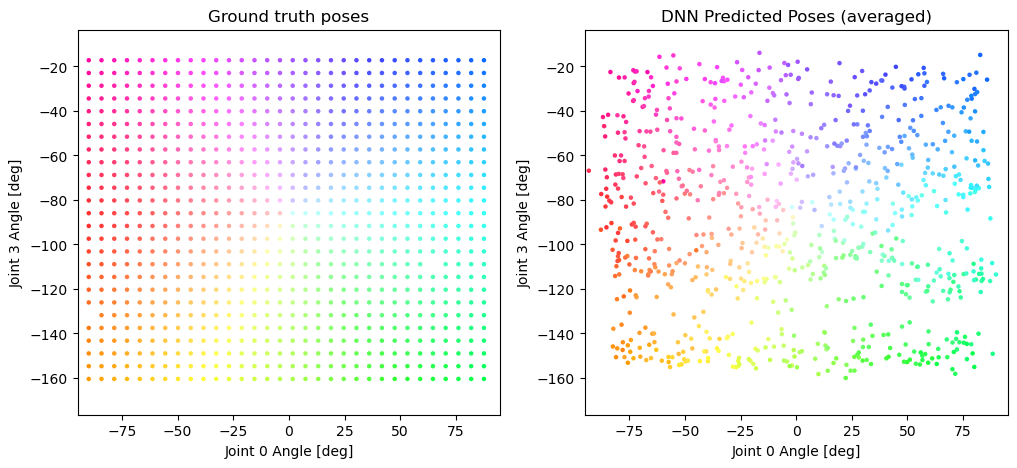

In [16]:
import matplotlib.colors as mcol

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def to_unit(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

mag, angle = cart2pol(avg_preds.index.get_level_values(0).to_numpy(), avg_preds.index.get_level_values(1).to_numpy() + 1.5)


colors = mcol.hsv_to_rgb(np.hstack([to_unit(angle)[:,None], to_unit(mag)[:,None]*0.8+0.2, np.ones_like(angle)[:,None]]))
c = np.sqrt((+1.5708)/0.1 - 32* (+0.2)/0.1)

fig, axs = plt.subplots(1,2, figsize=(12,5))#, sharex=True, sharey=True)

axs[0].scatter(np.rad2deg(avg_preds.index.get_level_values(0)), np.rad2deg(avg_preds.index.get_level_values(1)), s=5, c=colors)
axs[1].scatter(np.rad2deg(avg_preds.pred_q0), np.rad2deg(avg_preds.pred_q3), c=colors, s=5)#, marker="x")
axs[0].axis("equal")
axs[1].axis("equal")
axs[0].set_ylabel("Joint 3 Angle [deg]")
axs[1].set_ylabel("Joint 3 Angle [deg]")
axs[0].set_xlabel("Joint 0 Angle [deg]")
axs[1].set_xlabel("Joint 0 Angle [deg]")
axs[0].set_title("Ground truth poses")
axs[1].set_title("DNN Predicted Poses (averaged)")
axs[1].set_xlim(-95,95)
axs[1].set_ylim(-170, -10)
axs[0].set_xlim(-95,95)
axs[0].set_ylim(-170, -10)
# plt.colorbar()

Text(0.5, 1.0, 'CNN predictions for position (0, -1.5)')

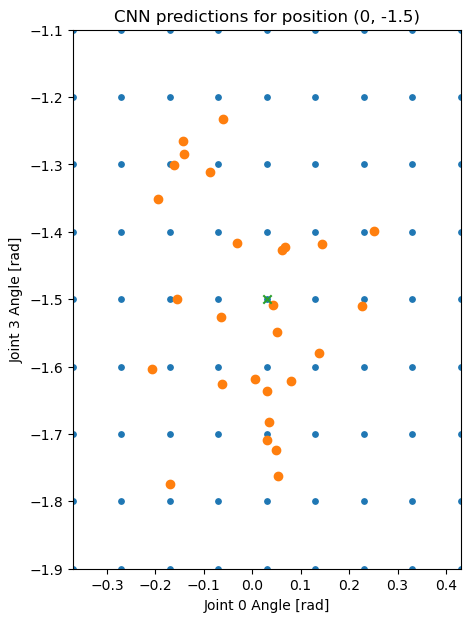

In [144]:
one_pos = raw_data.loc[(raw_data.model_id == 5) & (raw_data.cleaned_q0 == 0.03) & (raw_data.true_q3 == -1.5)]


fig, ax = plt.subplots(figsize=(5,7))
lin = np.arange(-5,5) * 0.1
xx, yy = np.meshgrid(lin + 0.03, lin-1.5)
plt.scatter(xx, yy, s=15)
plt.scatter(one_pos.pred_q0, one_pos.pred_q3)
plt.scatter([0.03], [-1.5], marker="x")
#plt.axis("equal")
plt.xlim(-0.37, 0.43)
plt.ylim(-1.9, -1.1)
plt.xlabel("Joint 0 Angle [rad]")
plt.ylabel("Joint 3 Angle [rad]")
plt.title(" predictions for position (0, -1.5)")

In [63]:
np.hstack([to_unit(angle)[:,None], to_unit(mag)[:,None], np.ones_like(angle)[:,None]]).shape

(830, 3)

In [14]:
avg_preds.index.get_level_values(0)

Index([-1.57, -1.57, -1.57, -1.57, -1.57, -1.57, -1.57, -1.57, -1.57, -1.57,
       ...
        1.53,  1.53,  1.53,  1.53,  1.53,  1.53,  1.53,  1.53,  1.53,  1.53],
      dtype='float64', name='cleaned_q0', length=830)

(-50.0, 50.0)

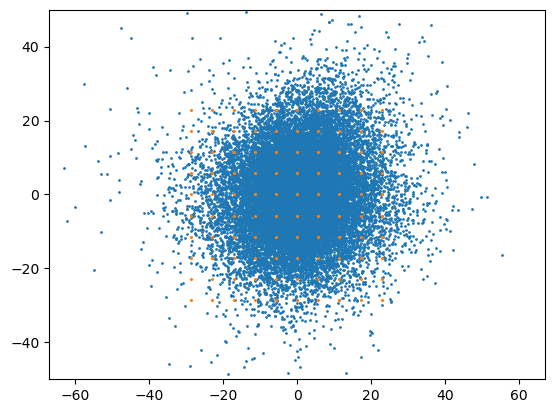

In [15]:
plt.scatter(raw_data.loc[raw_data.model_id == 2, "q0_error"], raw_data.loc[raw_data.model_id == 2, "q3_error"], s=1)
x = np.rad2deg(np.arange(10)*0.1 - 0.5)
x, y = np.meshgrid(x,x)
plt.scatter(x,y, s=2, marker="x")
plt.axis("equal")
plt.xlim(-50,50)
plt.ylim(-50,50)

In [104]:
import scipy.stats as st

xmin = ymin = -30
xmax = ymax = 30

x = raw_data.loc[raw_data.model_id == 5, "q0_error"]
y = raw_data.loc[raw_data.model_id == 5, "q3_error"]

xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)


# Contourf plot



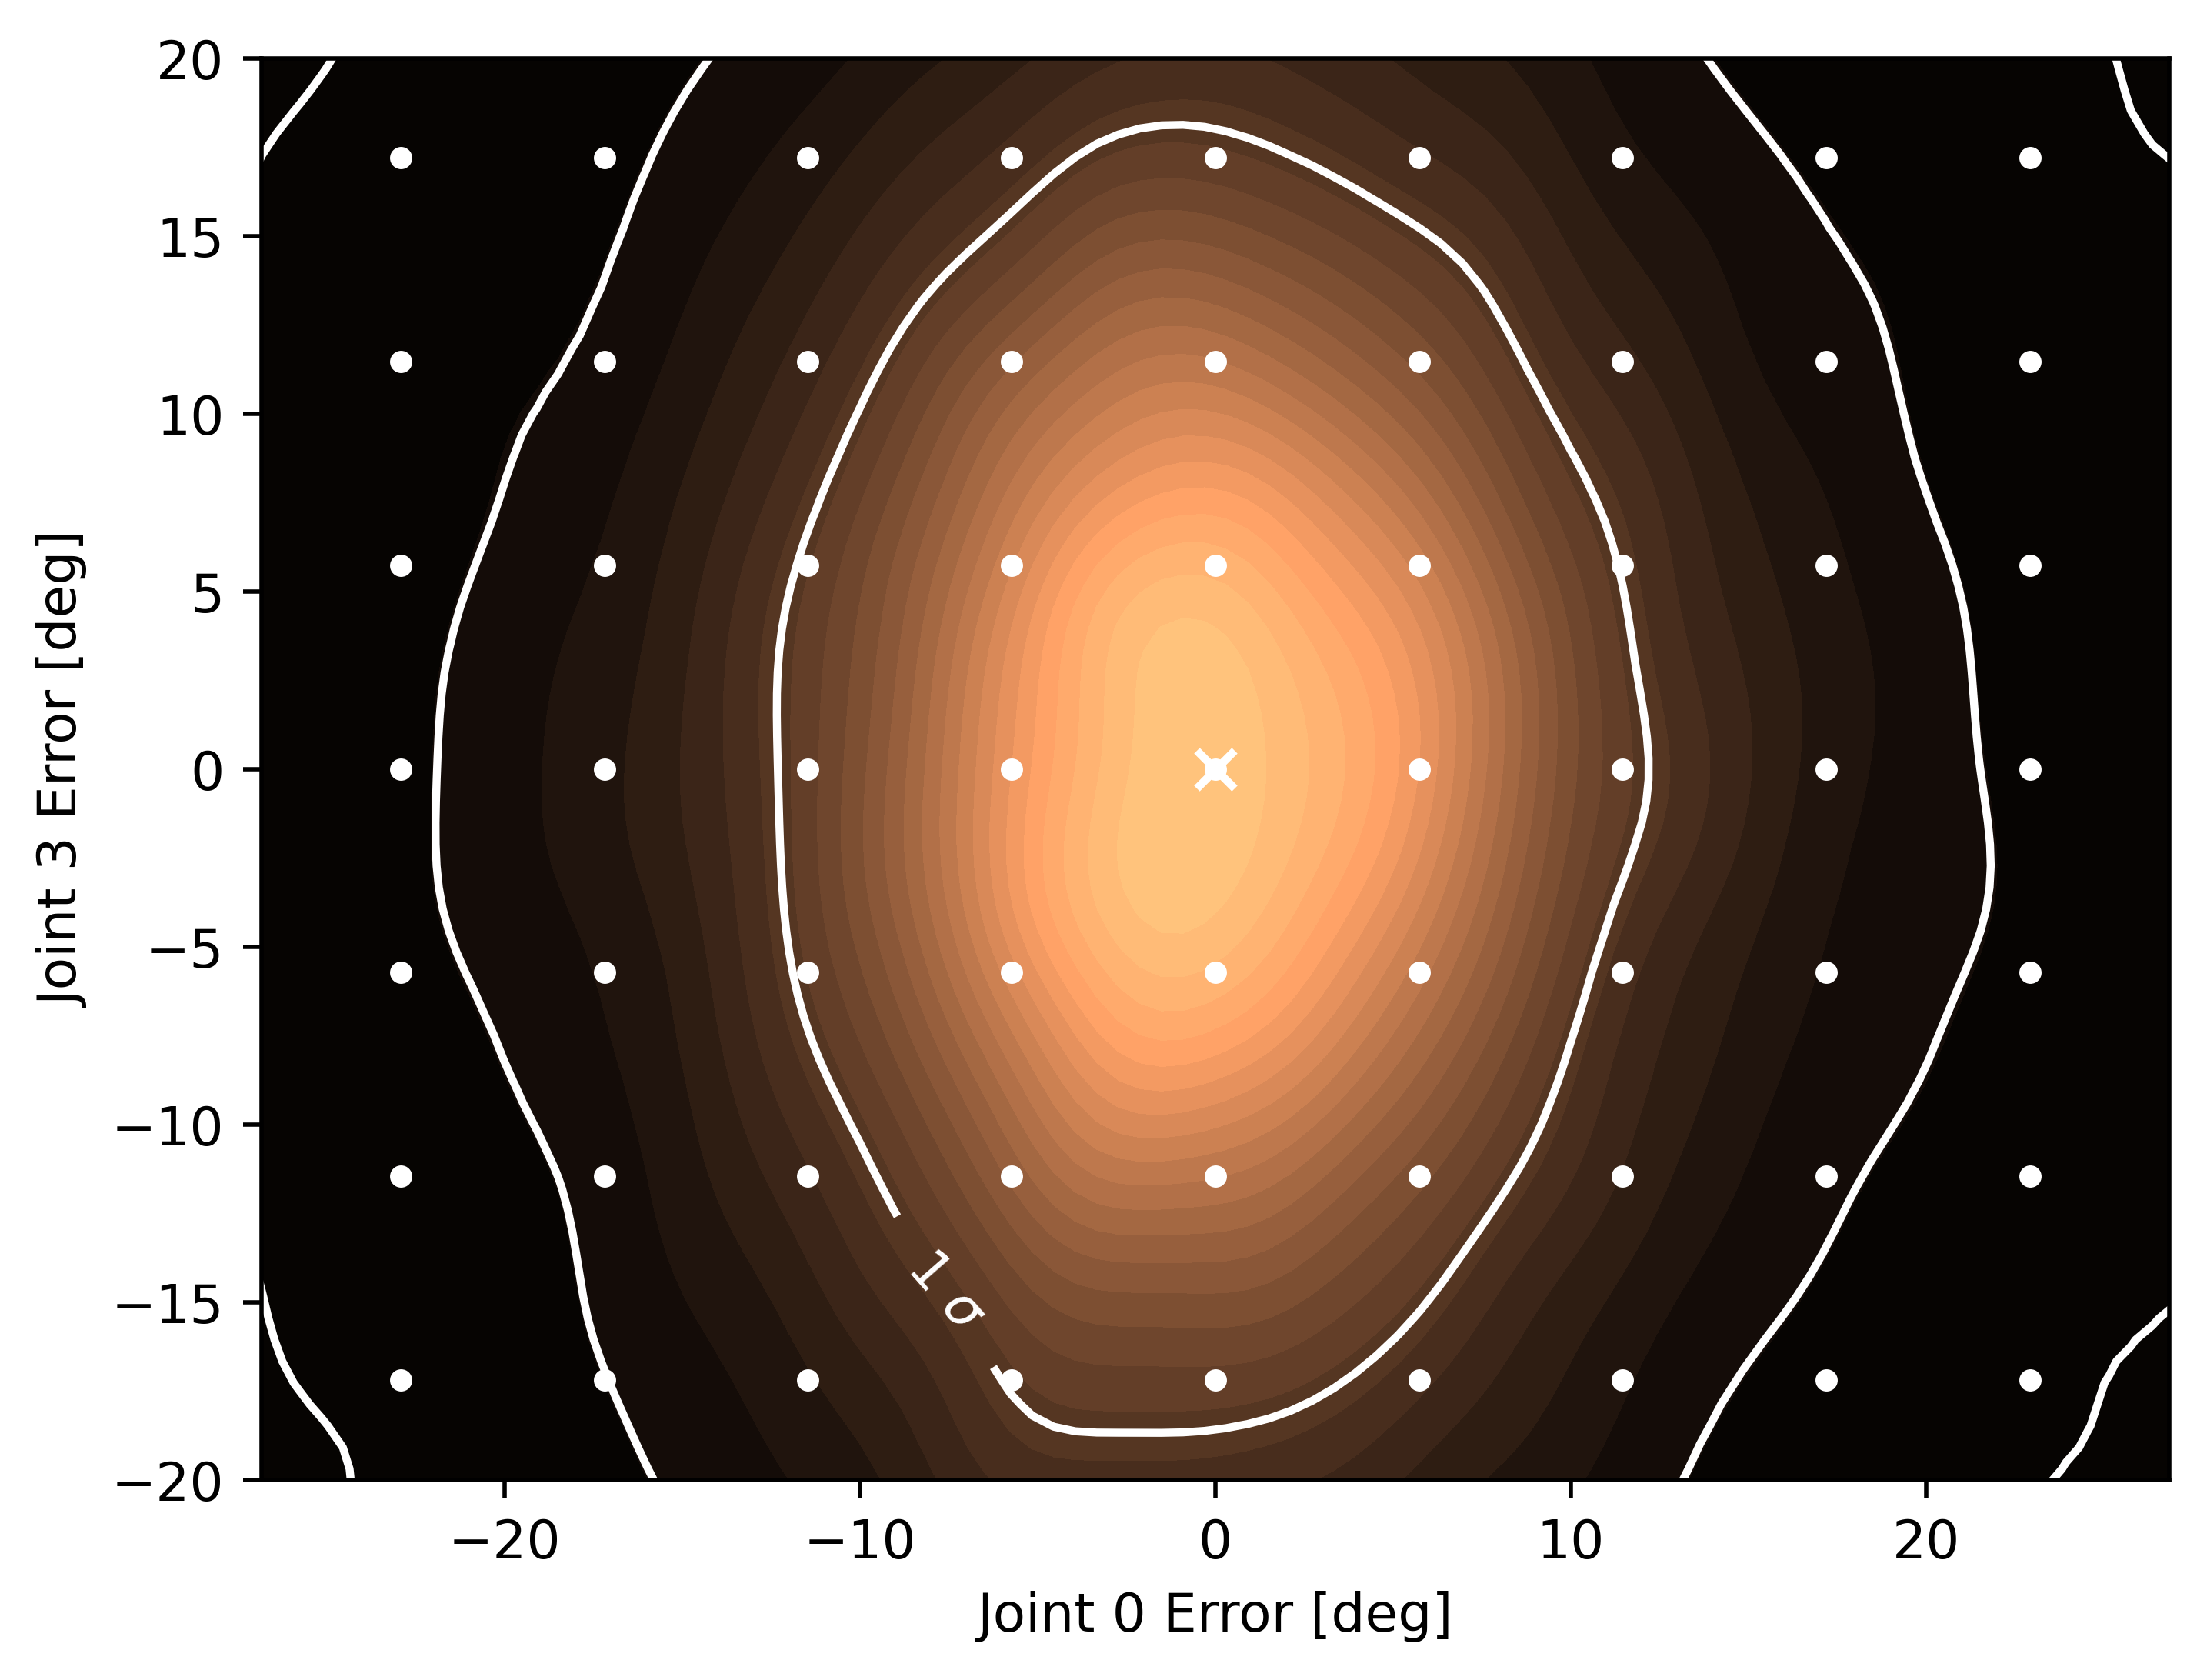

In [105]:
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, np.linspace(0,np.max(f),25),cmap='copper')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot

isoprop = np.array([1-0.9973,1-0.9545,1 - 0.6827])
values = np.ravel(f)
sorted_values = np.sort(values)[::-1]
normalized_values = np.cumsum(sorted_values) / values.sum()
idx = np.searchsorted(normalized_values, 1 - isoprop)
levels = np.take(sorted_values, idx, mode="clip")

cset = ax.contour(xx, yy, f, levels, colors='white')
# Label plot
L = ax.clabel(cset, [cset.levels[-1]], fmt=lambda _: r"1 $\sigma$", inline=1, fontsize=10)
#L[5].set_text("1$\sigma$")
samplepoints = np.rad2deg(np.arange(20) * 0.1 -1)
sctrx, sctry = np.meshgrid(samplepoints, samplepoints)
ax.scatter(sctrx, sctry, c="white",s=10)
ax.scatter([0],[0], marker="x", c="white", s=50)
ax.set_xlabel('Joint 0 Error [deg]')
ax.set_ylabel('Joint 3 Error [deg]')
plt.axis("equal")
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
fig.set_dpi(500)
plt.show()



In [82]:
cset.levels[0]

np.float64(2.7326721173317132e-05)

array([2.73267212e-05, 7.28091225e-05, 4.76830587e-04])

In [ ]:

        isoprop = np.asarray(quantile)
        values = np.ravel(data)
        sorted_values = np.sort(values)[::-1]
        normalized_values = np.cumsum(sorted_values) / values.sum()
        idx = np.searchsorted(normalized_values, 1 - isoprop)
        levels = np.take(sorted_values, idx, mode="clip")
        return levels

(-40.0, 40.0)

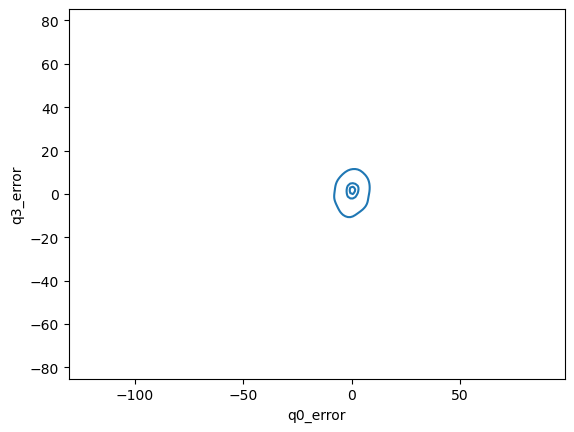

In [48]:
sns.kdeplot(
    x=x, y=y, levels=[0.65, 0.95, 0.99]
)
plt.axis("equal")
plt.ylim(-40,40)

Text(0.5, 0.92, 'Deviation from Average Spectogram')

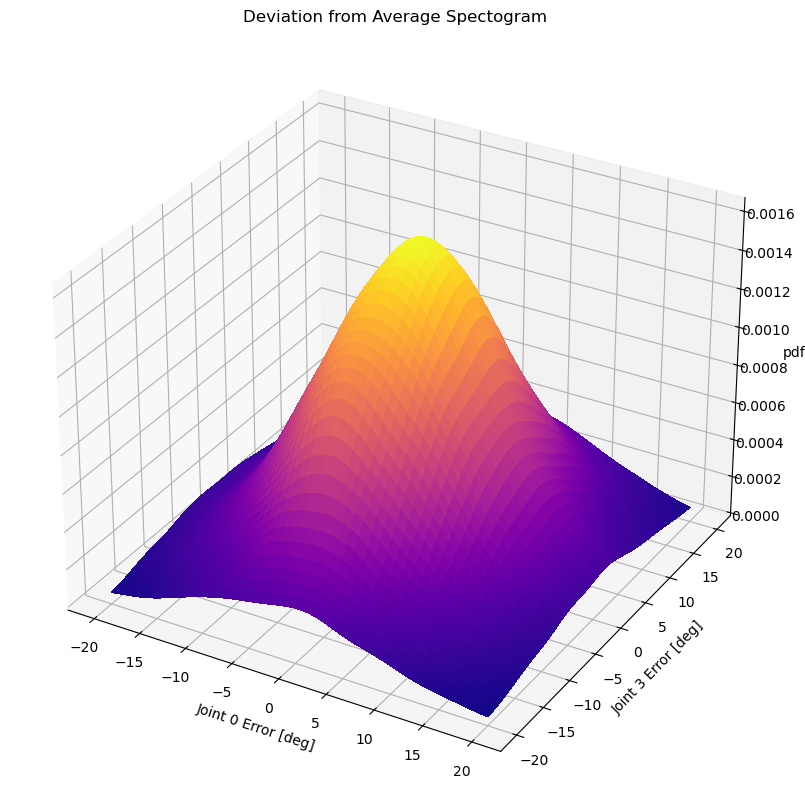

In [32]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(xx,yy, f, cmap="plasma",linewidth=0, antialiased=False)#, vmin = -2, vmax=2)

ax.set_xlabel('Joint 0 Error [deg]')
ax.set_ylabel('Joint 3 Error [deg]')
ax.set_zlabel('pdf')
ax.set_title('Deviation from Average Spectogram')

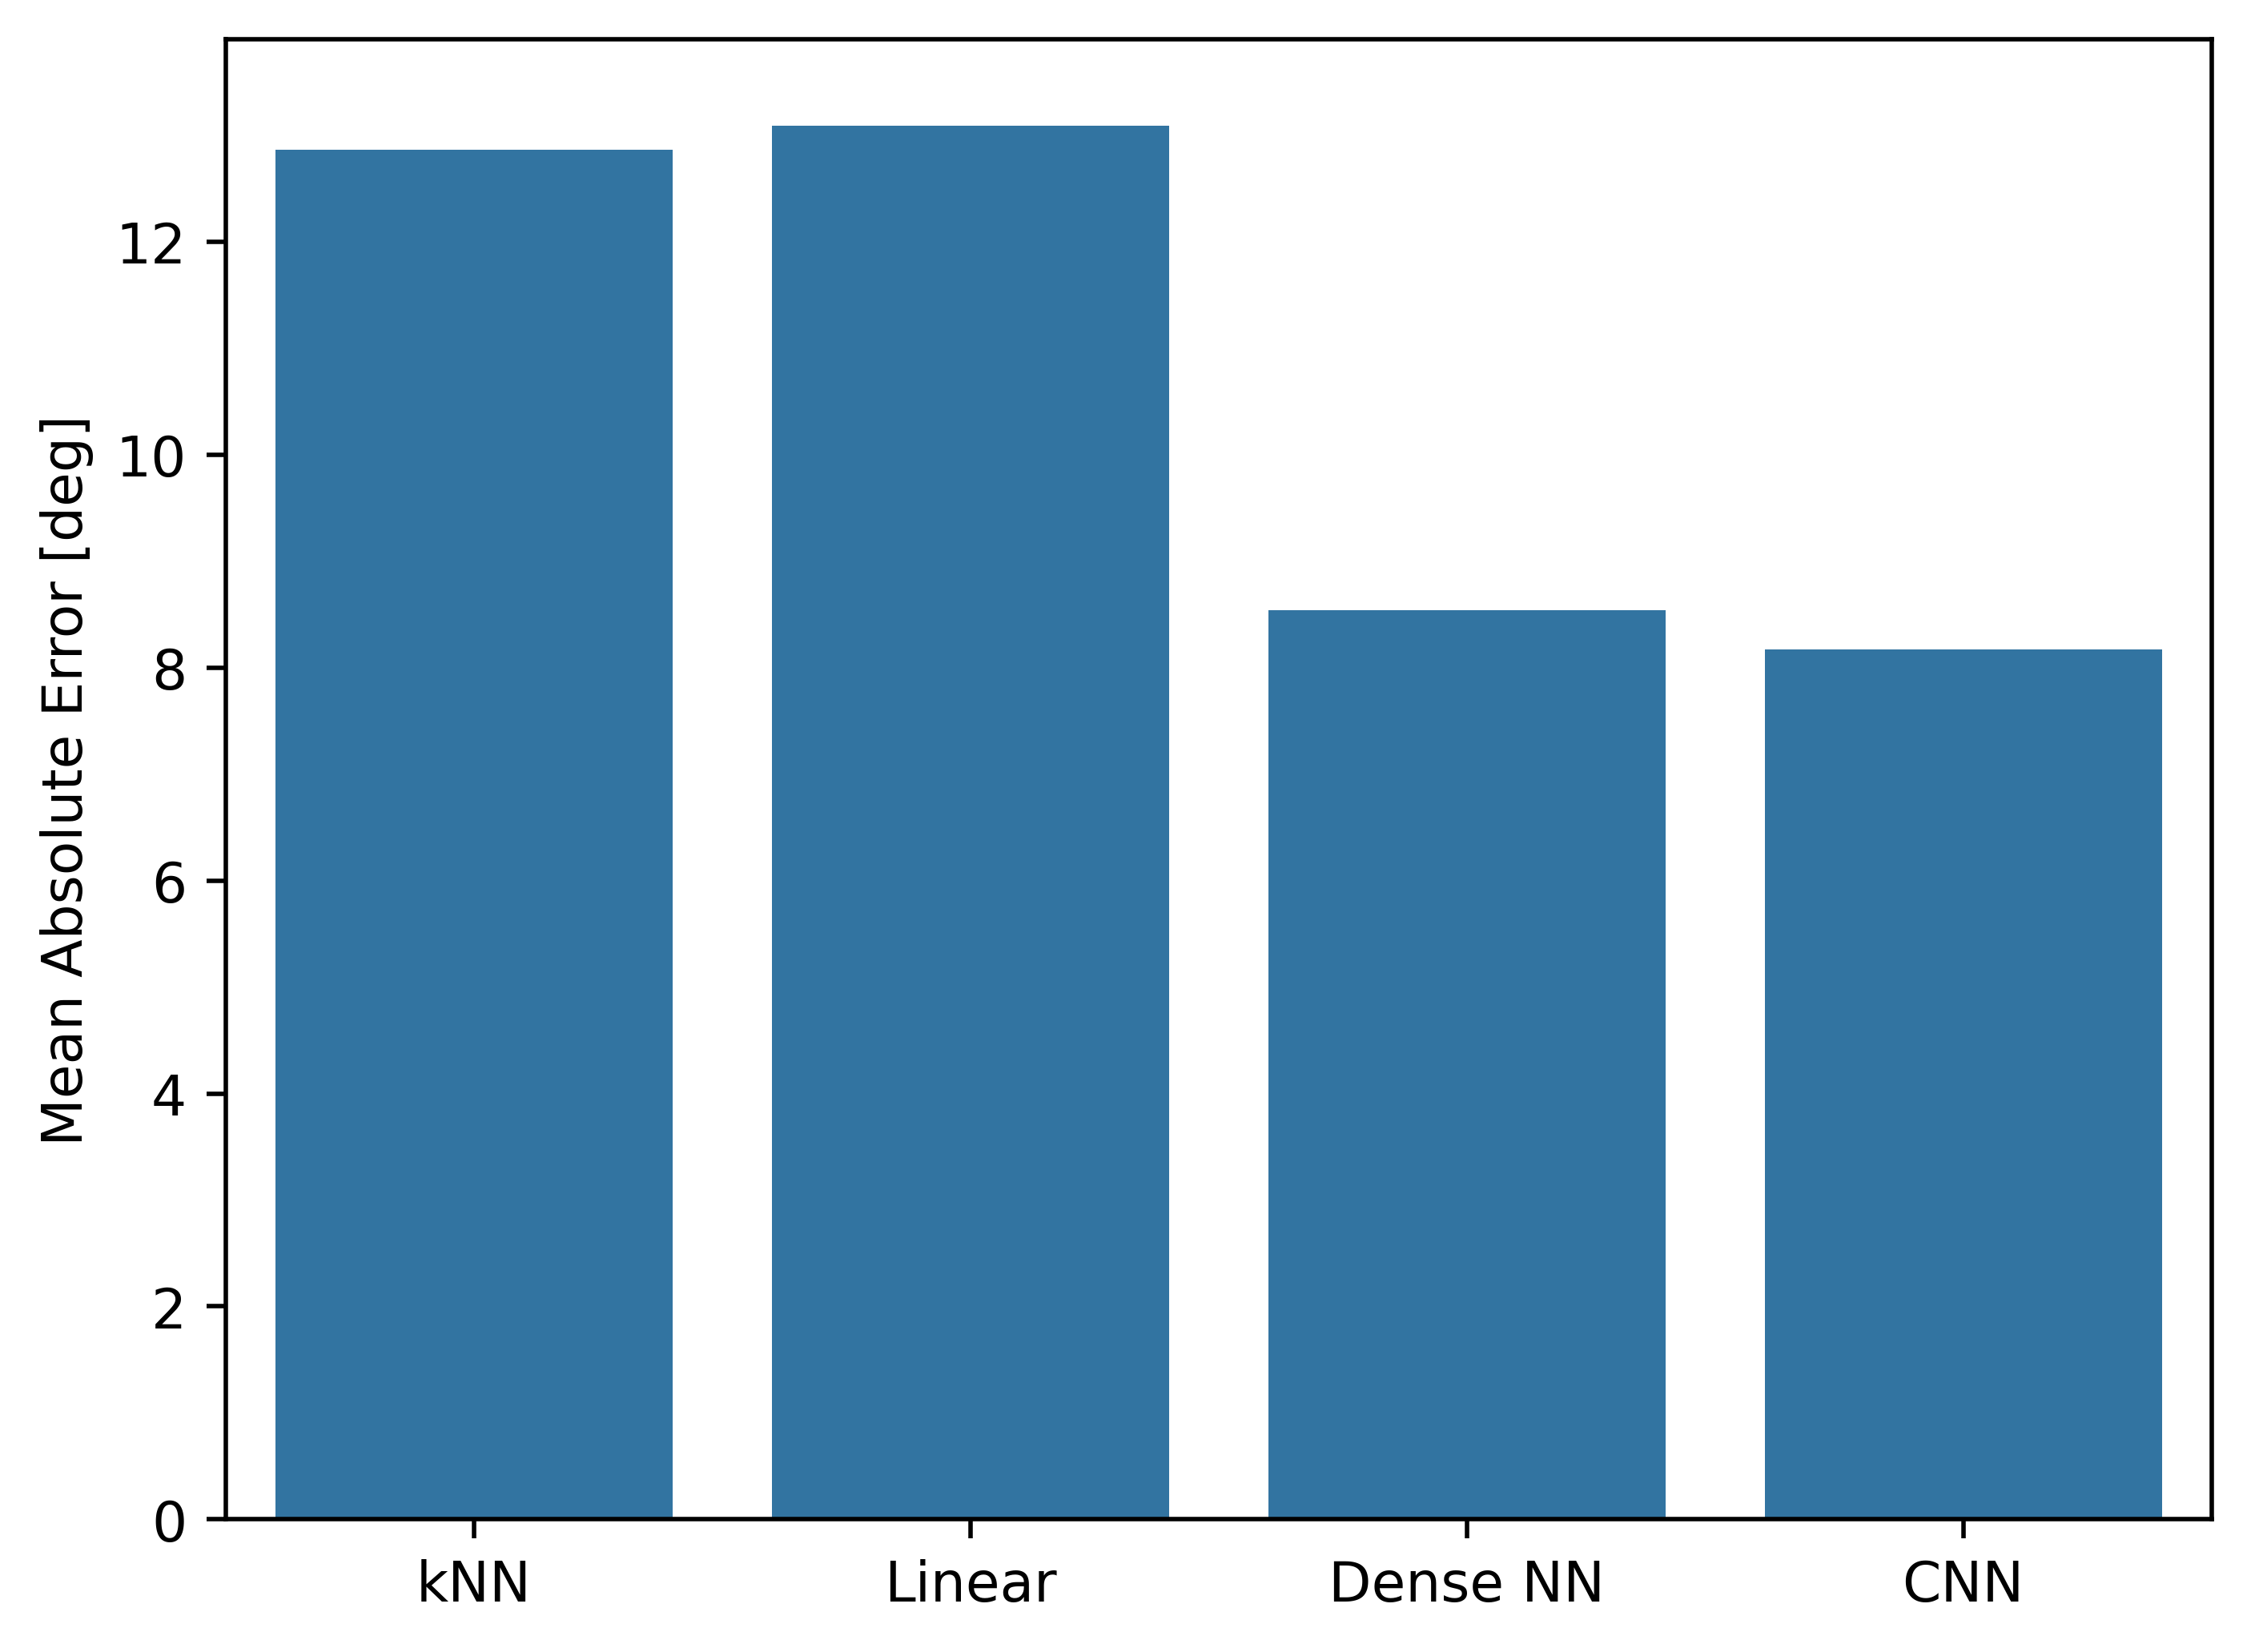

In [11]:
# for presentation
present = [0,1,2,5]
presentnames = ["kNN", "Linear", "Dense NN", "CNN"]
ax = sns.barplot(data=raw_data.loc[raw_data.model_id.isin(present)], x="model_id", y="error", errorbar=None)#("pi", 50))#
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
plt.ylim(0,13.9)
#plt.title("Mean Absolute Error of Models")
plt.gca().xaxis.set_major_formatter(lambda _,pos: presentnames[int(pos)])
plt.gcf().set_dpi(500)

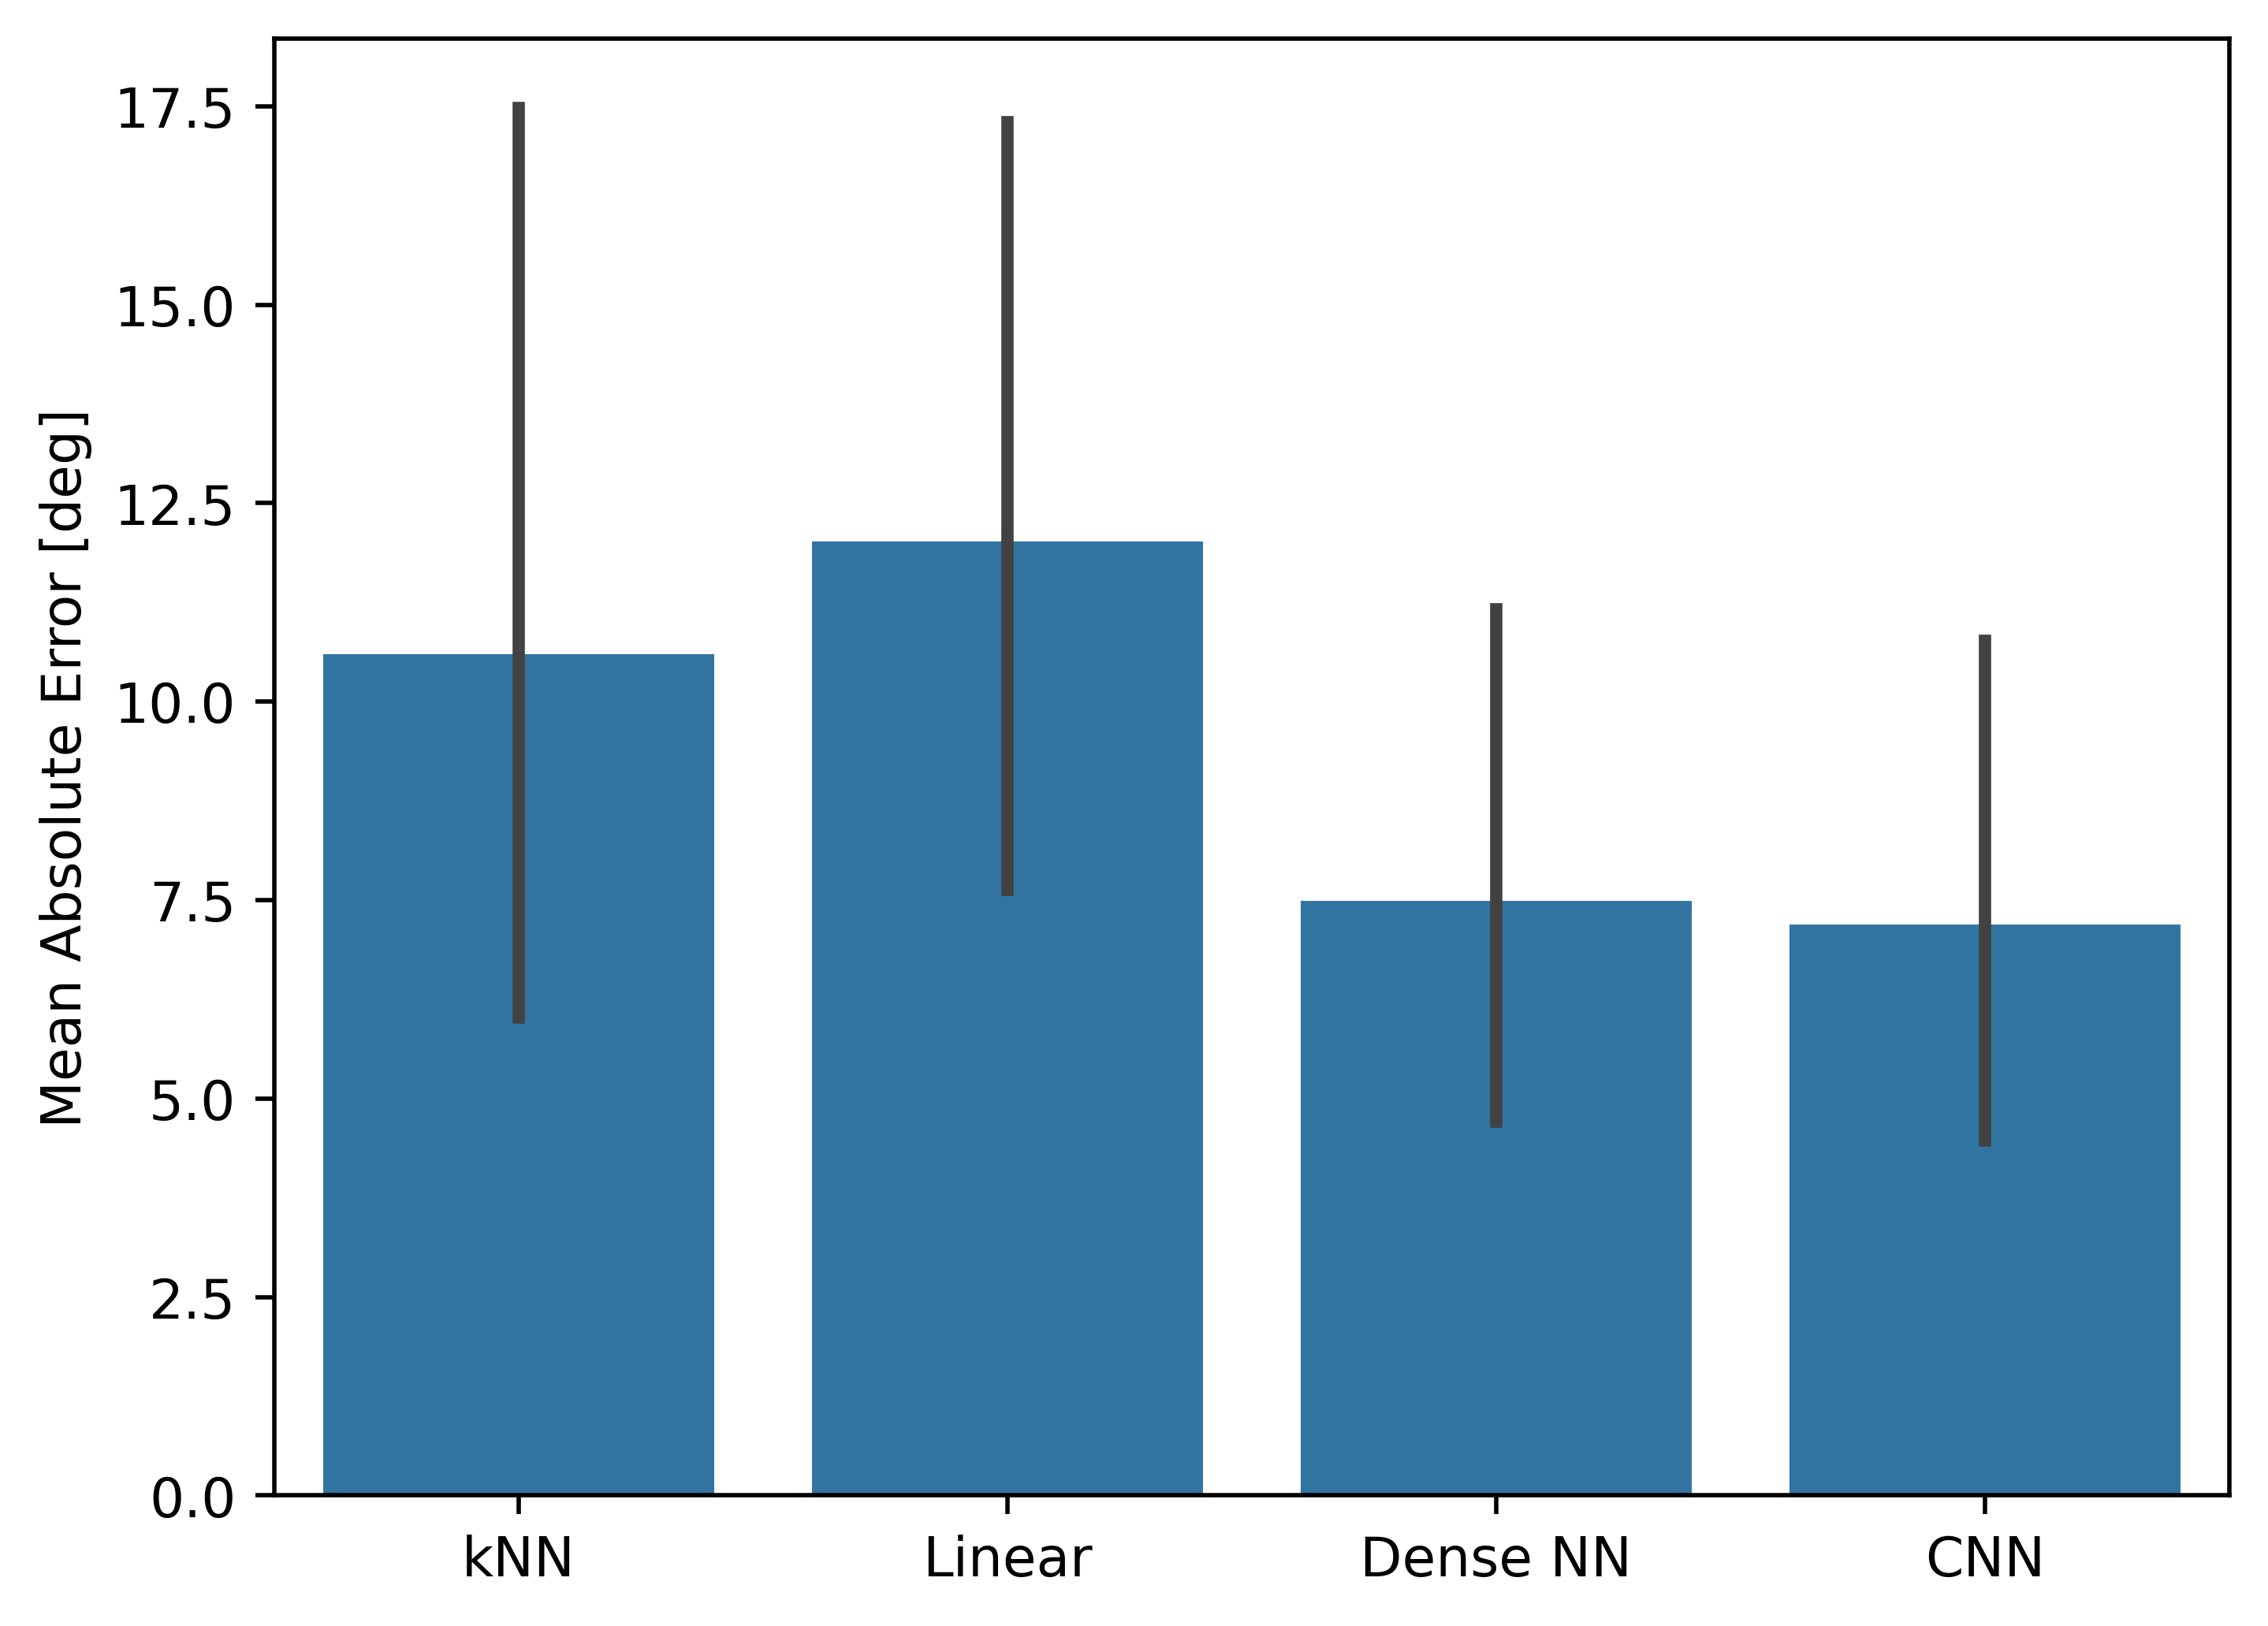

In [9]:
# for presentation
present = [0,1,2,5]
presentnames = ["kNN", "Linear", "Dense NN", "CNN"]
ax = sns.barplot(data=raw_data.loc[raw_data.model_id.isin(present)], x="model_id", y="error", errorbar=("pi", 50), estimator="median")#
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
# plt.title("Mean Absolute Error of Models")
plt.gca().xaxis.set_major_formatter(lambda _,pos: presentnames[int(pos)])
plt.gcf().set_dpi(500)

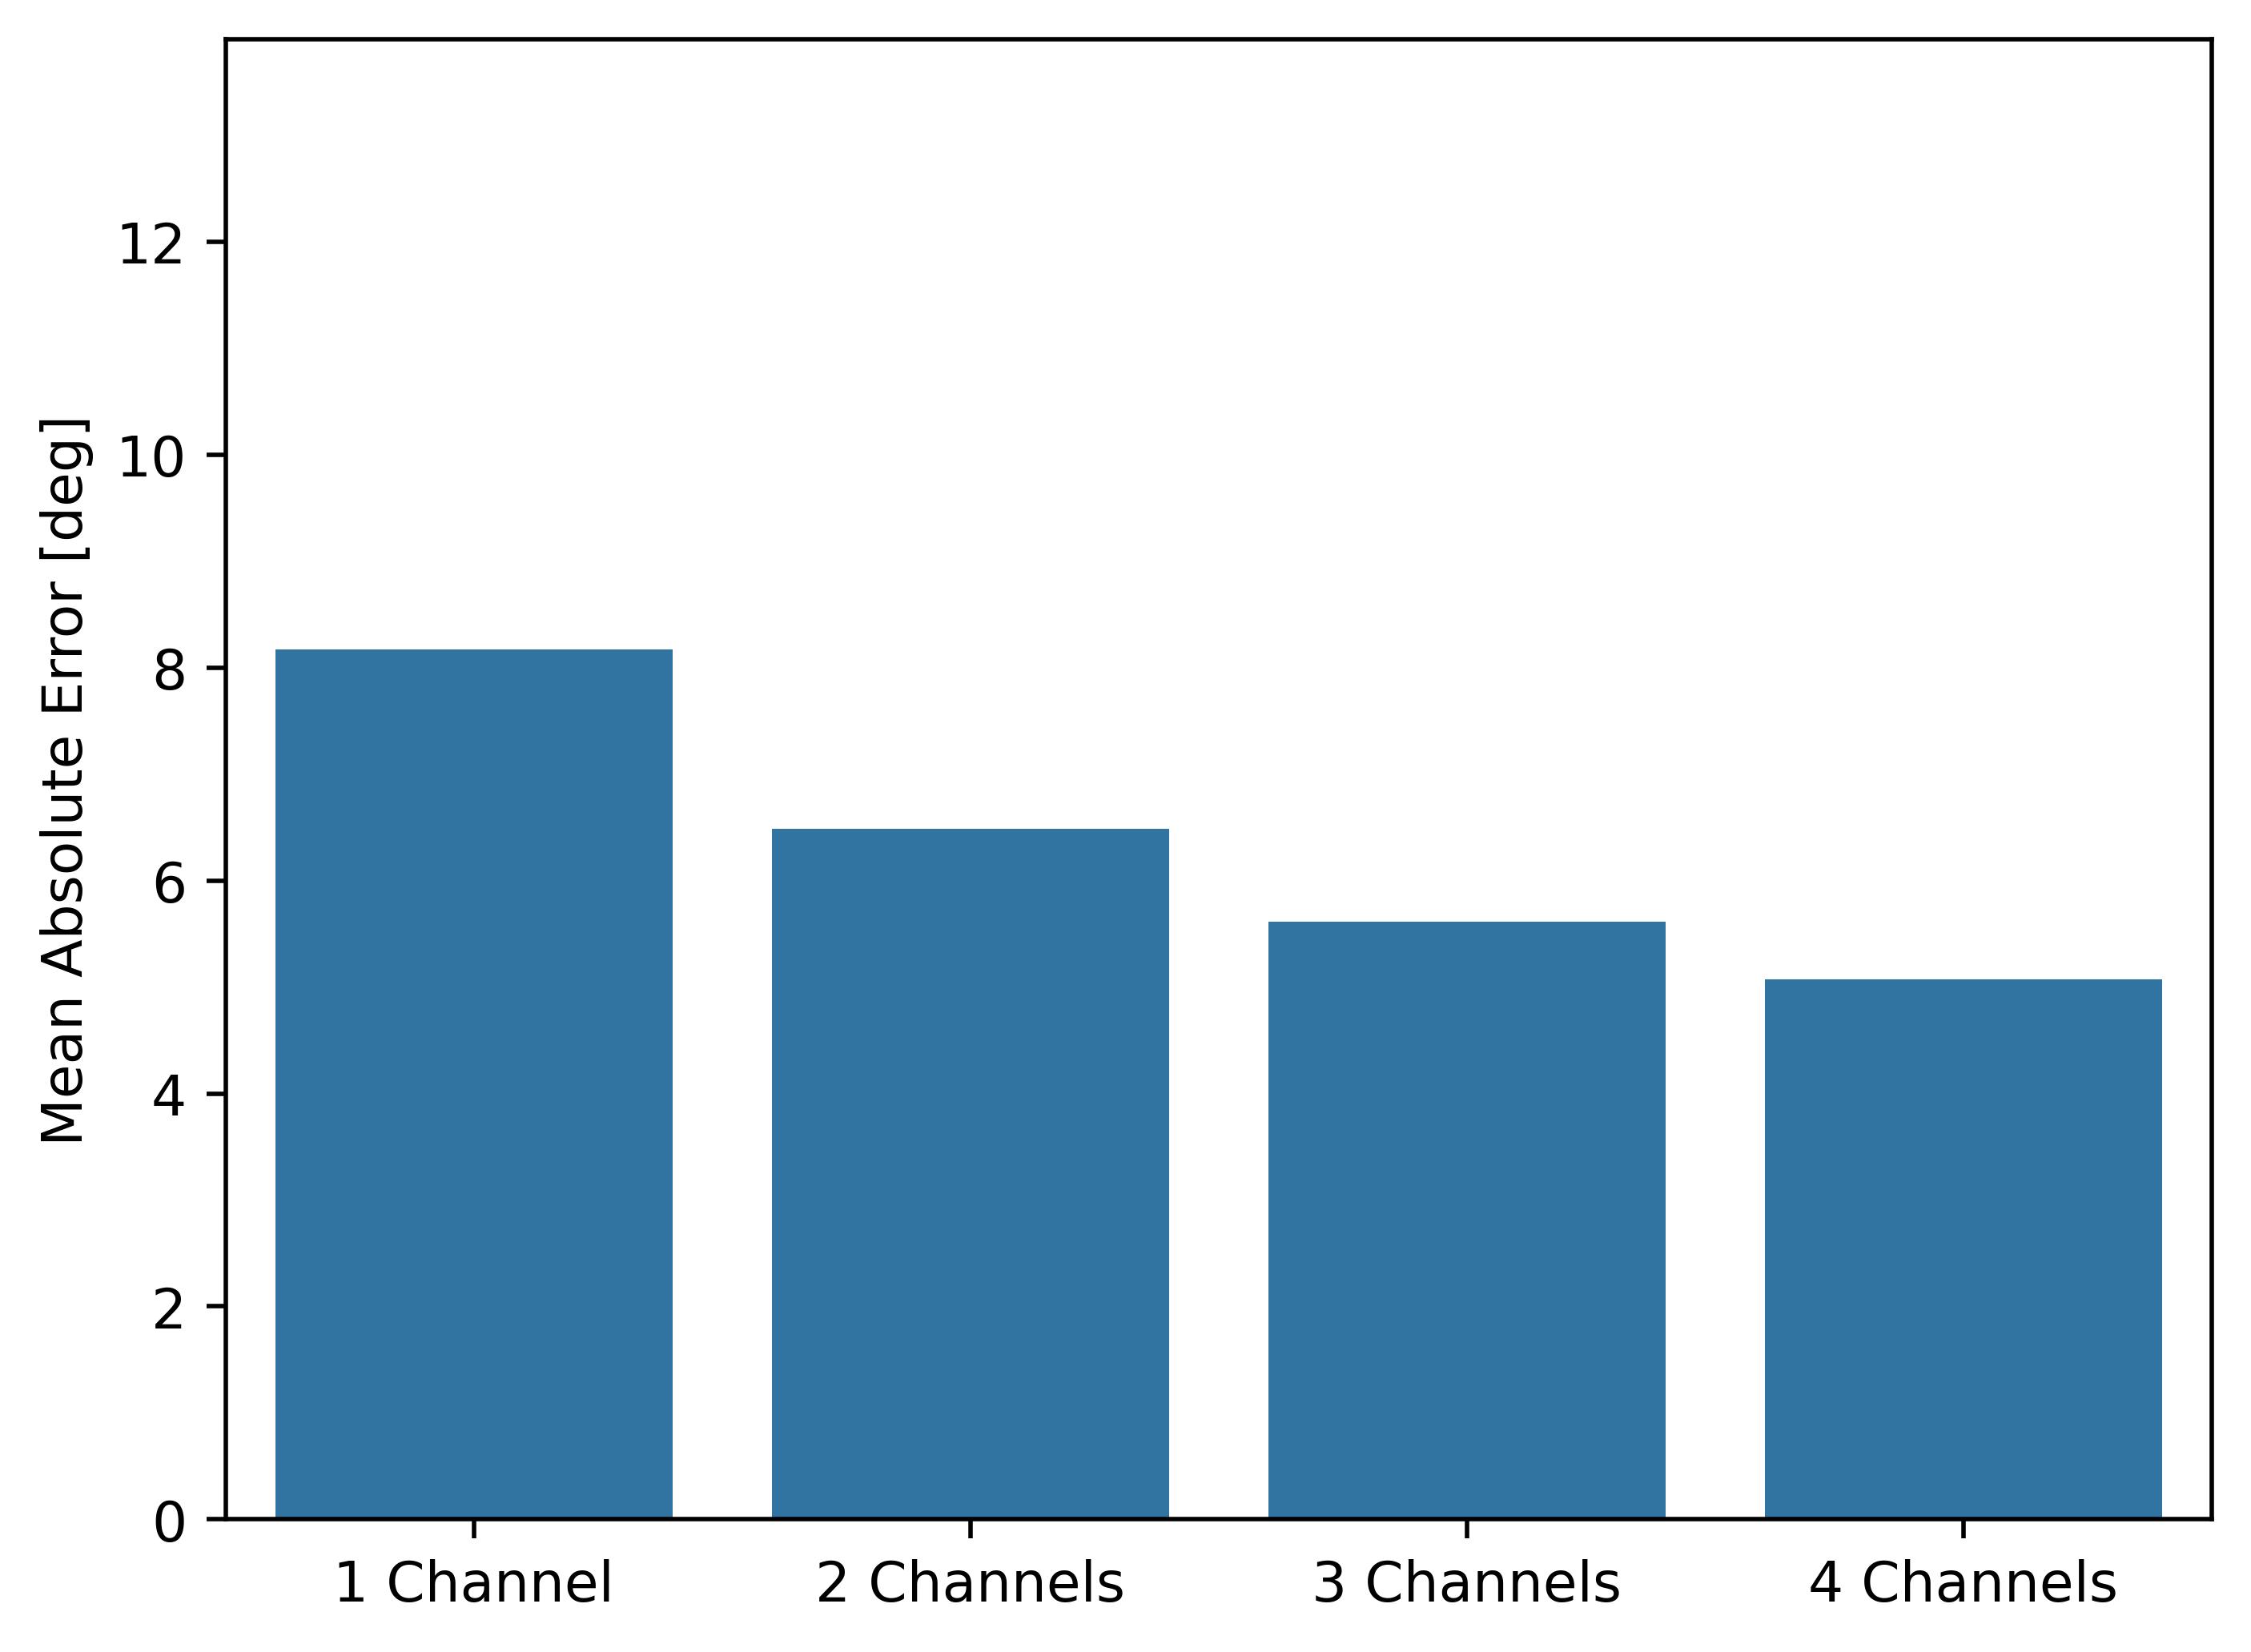

In [14]:
# for presentation
present = [5,6,7,8]
ax = sns.barplot(data=raw_data.loc[raw_data.model_id.isin(present)], x="model_id", y="error", errorbar=None)#("pi", 50))#
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
#plt.title("Mean Absolute Error of Multi-Channel CNNs")
plt.ylim(0,13.9)
plt.gca().xaxis.set_major_formatter(lambda _,pos: f"{int(pos)+1} Channel{"s" if pos > 0 else ""}")
plt.gcf().set_dpi(500)

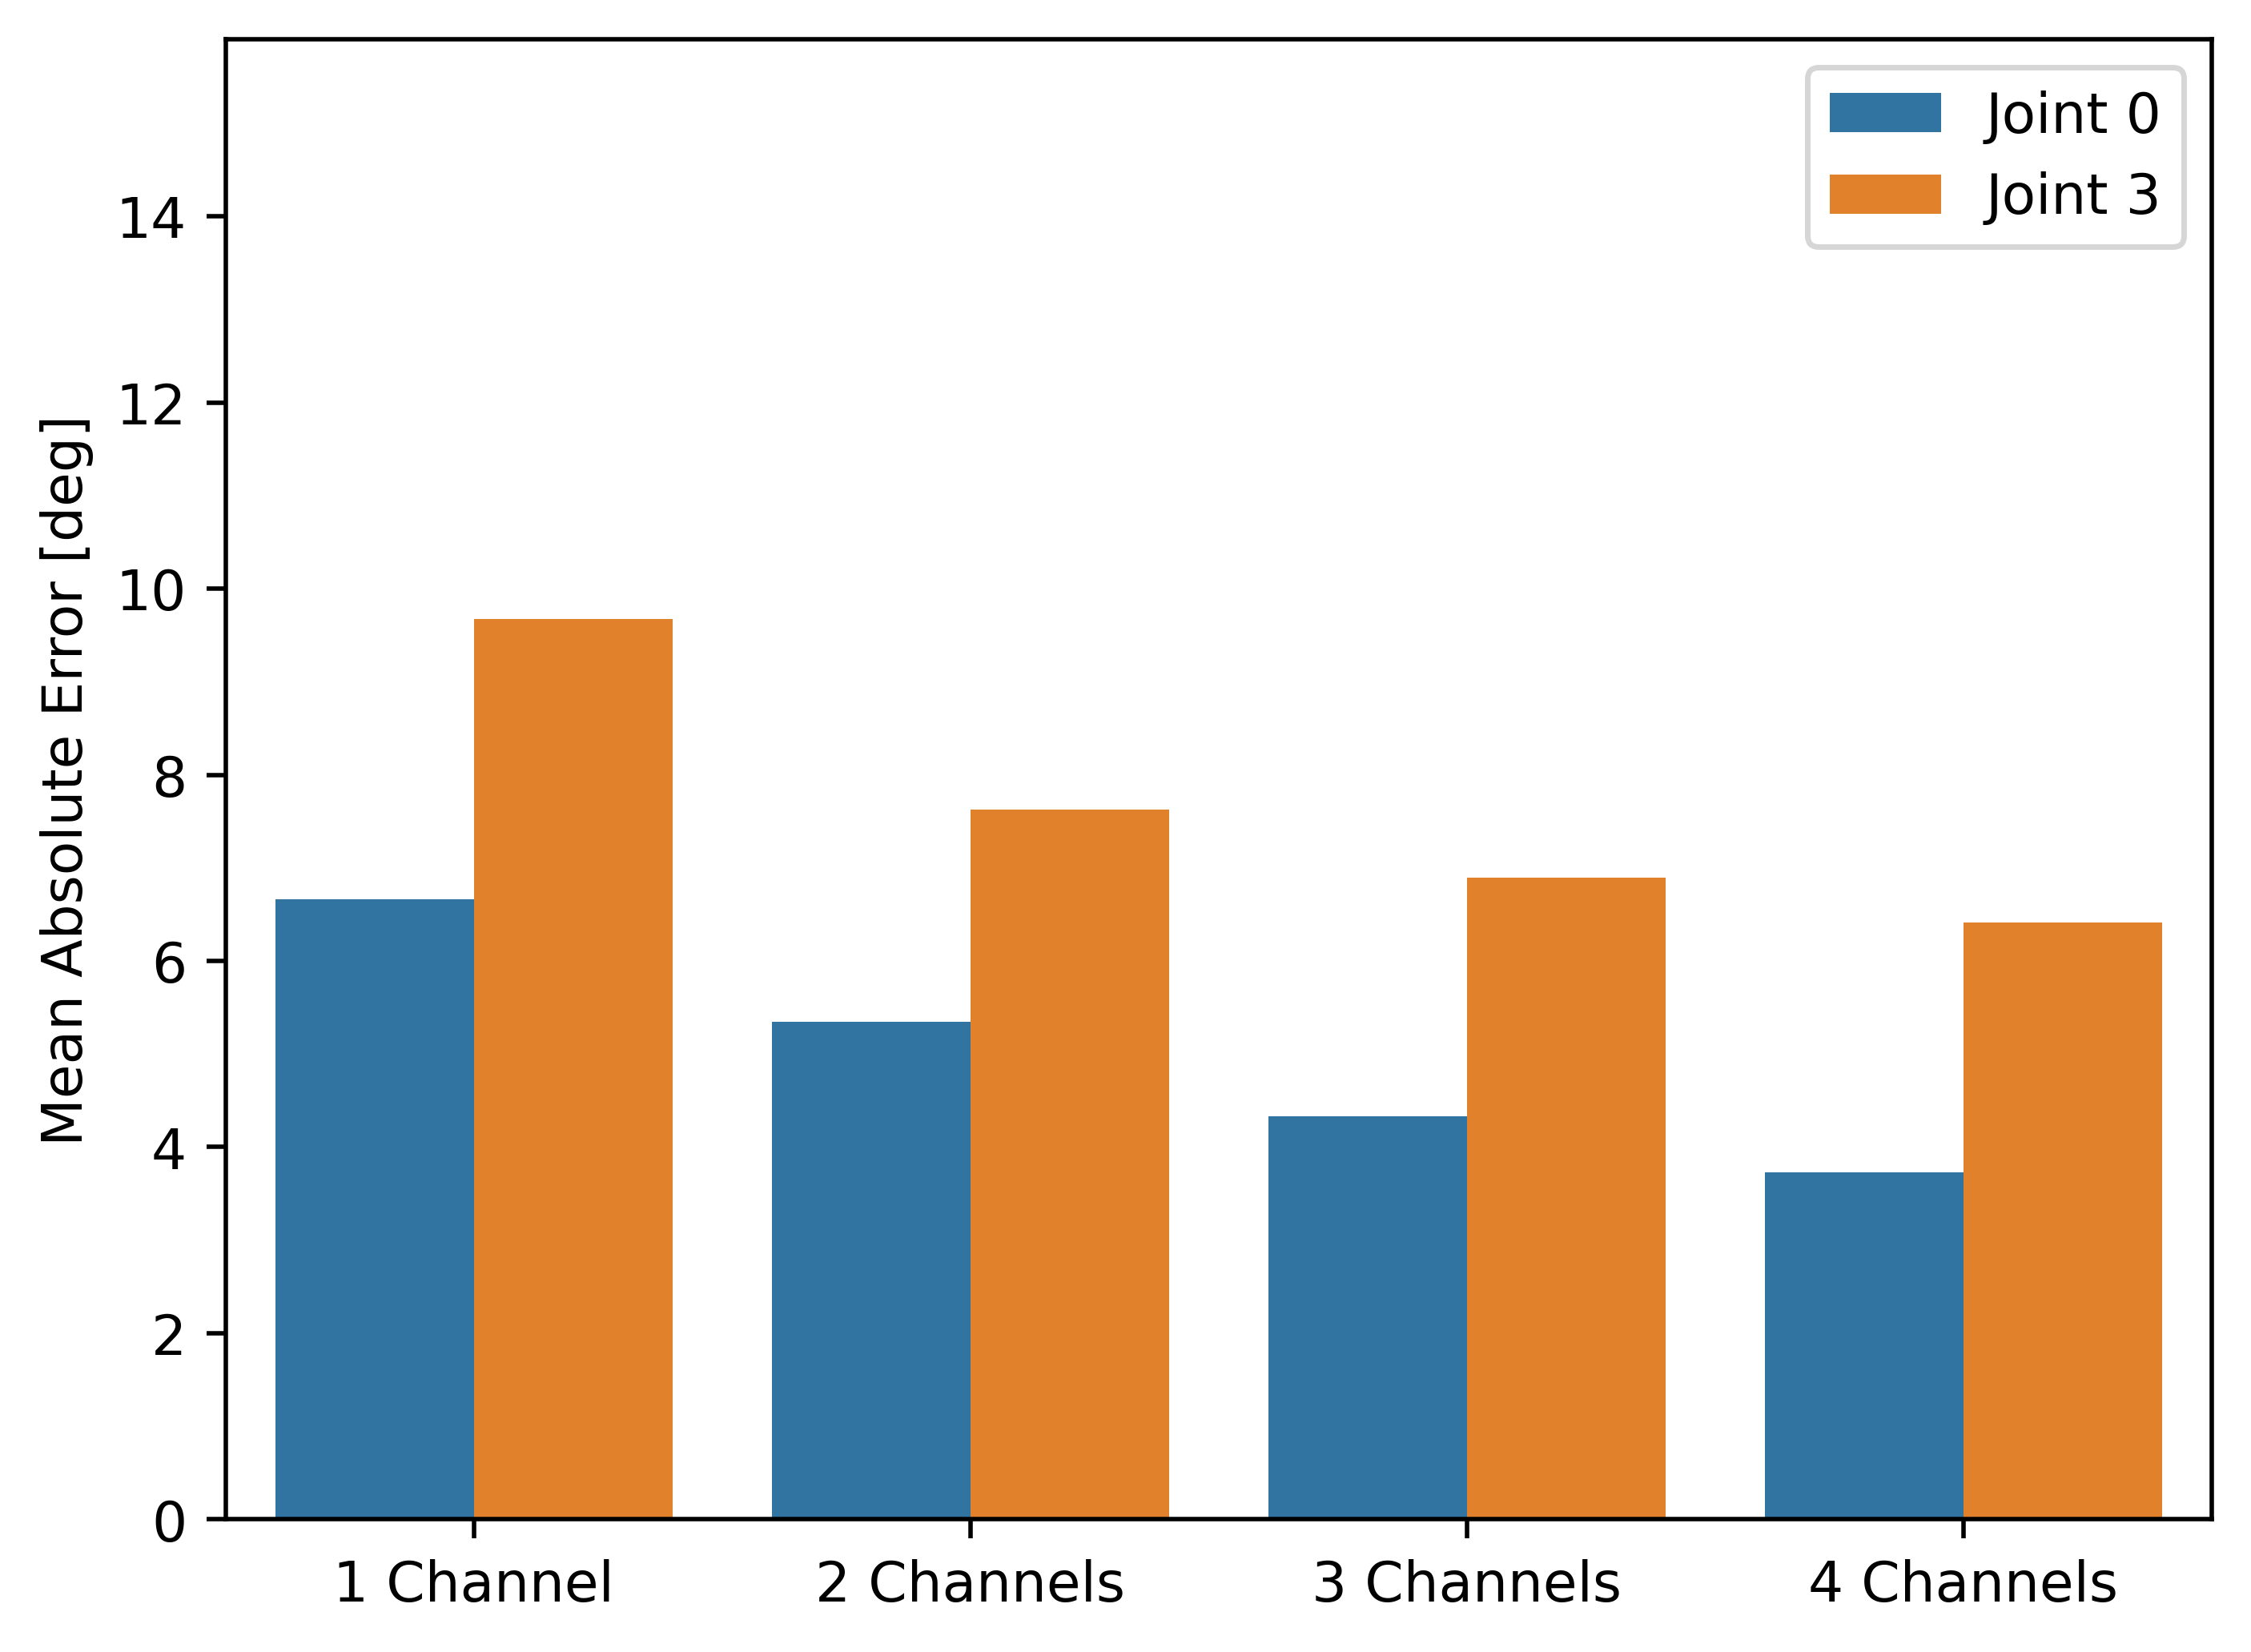

In [29]:
present = [5,6,7,8]
ax = sns.barplot(data=error_longform.loc[error_longform.model_id.isin(present)], x="model_id", y="value", hue="variable", errorbar=None)#("pi", 50))
plt.ylabel("Mean Absolute Error [deg]")
plt.xlabel("")
# plt.title("Mean Absolute Error of Multi-Channel CNNs")
plt.gca().xaxis.set_major_formatter(lambda _,pos: f"{int(pos)+1} Channel{"s" if pos > 0 else ""}")
plt.ylim(0,15.9)
plt.legend()
plt.gcf().set_dpi(500)

In [12]:
print("modelname     std q0  std q3")
for i in range(len(modelnames)):
    print(f"{modelnames[i]:13}  {np.std(raw_data.loc[raw_data.model_id == i, "q0_error"]): >5.2f}   {np.std(raw_data.loc[raw_data.model_id == i, "q3_error"]): >5.2f}")

modelname     std q0  std q3
kNN            14.74   19.00
Linear         17.16   16.09
3 Layer FC     10.87   11.69
4 Layer FC     11.01   12.05
5 Layer FC     11.72   12.71
1-Channel CNN   9.05   12.62
2-Channel CNN   7.52    9.95
3-Channel CNN   6.29    9.09
4-Channel CNN   5.29    8.51


Text(0.5, 0.98, 'Histogram of errors for selected Models')

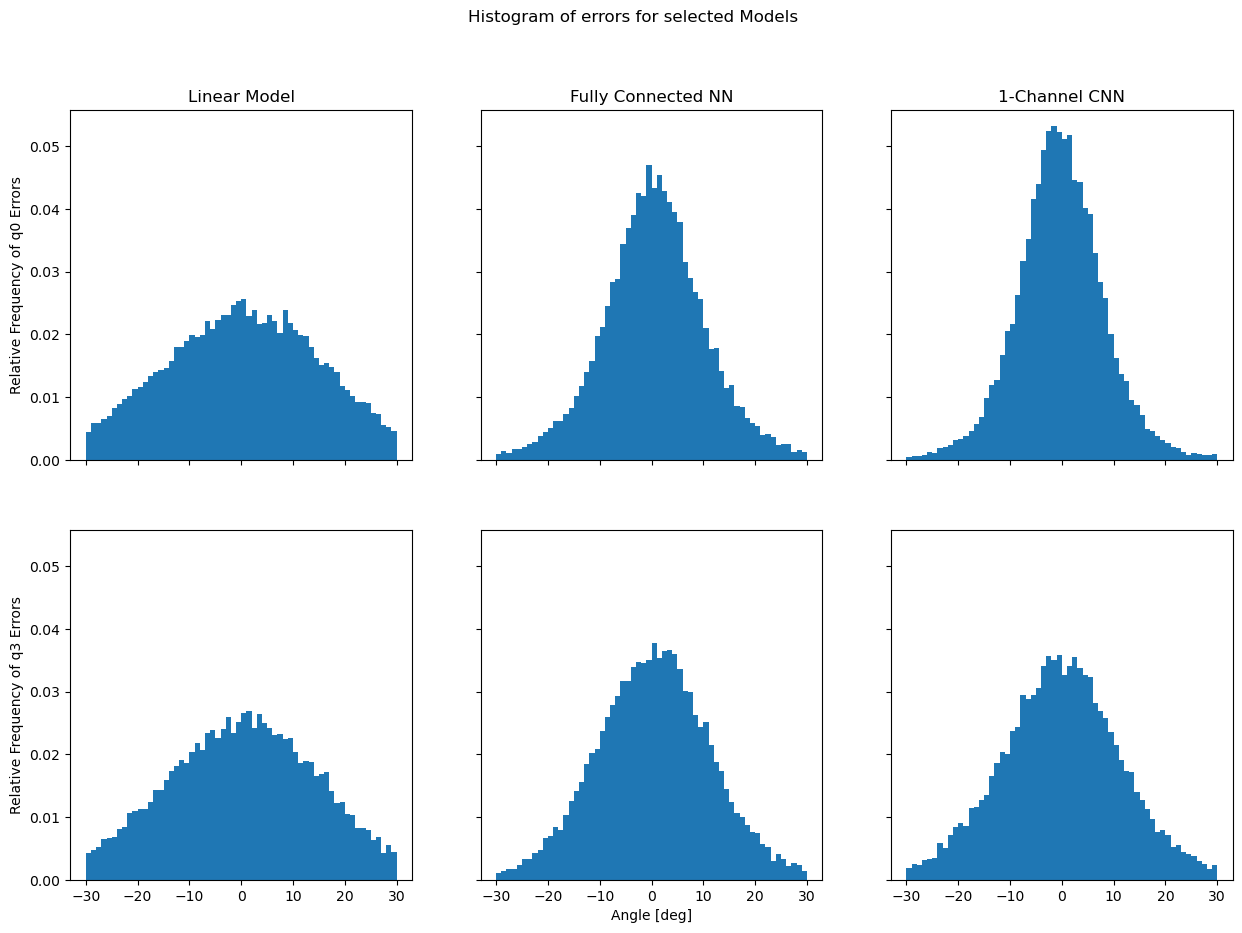

In [13]:
#sns.barplot(data=raw_data, x="q0_error", y="model_id")
datapoints = np.sum(raw_data.model_id == 0)
fig, axs = plt.subplots(2,3, sharex=True, sharey=True, figsize=(15,10))
axs[0,0].hist(x=raw_data.loc[raw_data.model_id==1, "q0_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[0,0].set_ylabel("Relative Frequency of q0 Errors")
axs[0,0].set_title("Linear Model")
axs[0,1].hist(x=raw_data.loc[raw_data.model_id==2, "q0_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[0,1].set_title("Fully Connected NN")
axs[0,2].hist(x=raw_data.loc[raw_data.model_id==5, "q0_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[0,2].set_title("1-Channel CNN")
axs[1,0].hist(x=raw_data.loc[raw_data.model_id==1, "q3_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[1,0].set_ylabel("Relative Frequency of q3 Errors")
axs[1,1].hist(x=raw_data.loc[raw_data.model_id==2, "q3_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
axs[1,1].set_xlabel("Angle [deg]")
axs[1,2].hist(x=raw_data.loc[raw_data.model_id==5, "q3_error"], bins=60, range=(-30,30), weights=np.ones(datapoints) / datapoints)
fig.suptitle("Histogram of errors for selected Models")

In [14]:
print(len(raw_data.true_q3.unique()))

26


In [16]:
pivot_q0 = pd.pivot_table(raw_data, columns="model_id", values = ["pred_q0","abs_q0_error","abs_q3_error","error"], index="cleaned_q0", aggfunc="mean")
pivot_q0

abs_q0_error                                                        \
model_id              0          1          2          3          4         5   
cleaned_q0                                                                      
-1.57          7.380045  27.949087  14.707829  19.287031  23.011594  9.428077   
-1.47          5.294363  18.743142  11.467146  13.853177  17.979726  8.577390   
-1.37          6.314765  14.363340   8.036414   7.757222  11.076080  6.243488   
-1.27          5.624219  13.189953   6.874338   5.171186   6.375294  6.070594   
-1.17          6.369693  12.144226   6.347466   5.337702   5.634023  5.321043   
-1.07          6.317652  12.443573   6.731152   6.565923   5.796169  5.712249   
-0.97          7.480164  11.698886   6.136383   6.708701   6.013470  5.373486   
-0.87          9.363780  11.619400   6.554816   7.512294   6.920199  6.191108   
-0.77          7.880197  11.737740   6.418871   7.315518   7.051258  6.363570   
-0.67          7.868209  11.905537   6.205194   7.151062   6.999124  6.752340   
-0.57         10.867767  11.829676   5.775398   6.651045   6.625475  6.686017   
-0.47         10.083540  11.438864   4.946976   5.564508   5.653953  5.852199   
-0.37         10.264626  12.016186   4.628085   4.955106   5.236306  5.318292   
-0.27         13.359982  11.354591   4.785425   4.374850   4.458404  5.174495   
-0.17         13.045319  12.589486   5.587776   5.301199   5.583782  5.859131   
-0.07         14.939048  11.530639   5.789542   5.476188   5.570019  6.560275   
 0.03         22.486808  11.085993   6.076516   5.795459   6.057676  7.079450   
 0.13         18.989911  13.267619   6.826659   6.523862   6.983309  7.128945   
 0.23         13.898128  14.150753   6.240029   5.751322   6.404592  5.847916   
 0.33         14.893050  14.492722   7.490742   7.336628   8.102948  5.655290   
 0.43         18.638149  12.893983   7.539543   7.621987   8.202308  4.925013   
 0.53         17.490454  12.775365   8.885159   8.876238   9.634794  5.686725   
 0.63         15.086024  13.161947   8.961943   9.889552  10.773859  5.708298   
 0.73         14.845652  12.342101   9.349850   9.138070   9.853234  6.160314   
 0.83         14.362758  12.154636   9.401287   8.951798   9.330934  6.065486   
 0.93         10.672409  12.965188  10.062118   9.381041   9.622661  6.779409   
 1.03          7.908384  12.173086  10.215133   9.276394   9.468174  7.957011   
 1.13          8.082499  12.527701  10.449940   9.758171   9.979992  8.543363   
 1.23          5.153799  12.229280   9.883560   9.305769   9.592202  7.871245   
 1.33          3.421968  13.855601  10.530449  10.044853  10.468121  8.751193   
 1.43          3.968812  16.265787  10.589197  10.879108  11.320294  8.099851   
 1.53          5.215124  20.835806  13.263409  14.308984  15.236836  9.735933   

                                         abs_q3_error  ...      error  \
model_id           6         7         8            0  ...          8   
cleaned_q0                                             ...              
-1.57       8.330558  7.296653  5.855177    15.608849  ...  11.796744   
-1.47       6.691131  6.308923  4.293845    13.854063  ...   8.566778   
-1.37       4.553026  4.336954  3.171107    14.830792  ...   7.741181   
-1.27       4.099212  4.029312  3.122692    14.385079  ...   7.045278   
-1.17       4.363944  3.562212  3.003131    18.689371  ...   7.453629   
-1.07       4.316028  3.824053  3.168089    19.964665  ...   7.611125   
-0.97       3.998754  3.573500  3.484583    18.894812  ...   6.859608   
-0.87       4.508089  3.923469  3.398906    17.977795  ...   7.194957   
-0.77       4.538965  3.653101  3.587133    17.679231  ...   7.232936   
-0.67       4.399686  4.070488  3.114706    21.323129  ...   7.062060   
-0.57       5.037685  4.205459  3.587520    16.229776  ...   7.390646   
-0.47       4.674784  4.104564  3.152219    15.848041  ...   7.191256   
-0.37       4.270254  3.950845  3.552438    16.731647  ...   7.507439   
-0.27  

(np.float64(-1.725), np.float64(1.685), np.float64(-1.65), np.float64(1.65))

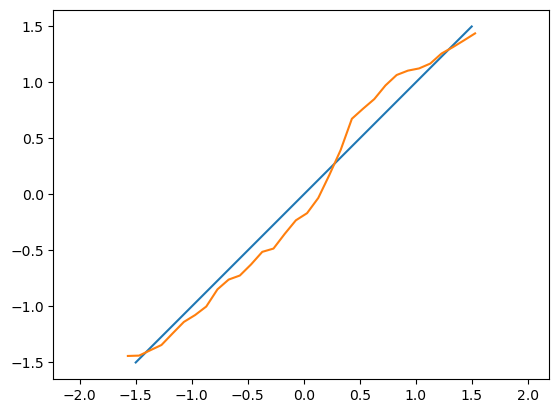

In [17]:
plt.plot((-1.5,1.5), (-1.5,1.5))
plt.plot(pivot_q0.index, pivot_q0[("pred_q0", 0)])
plt.axis("equal")


(0.0, 12.0)

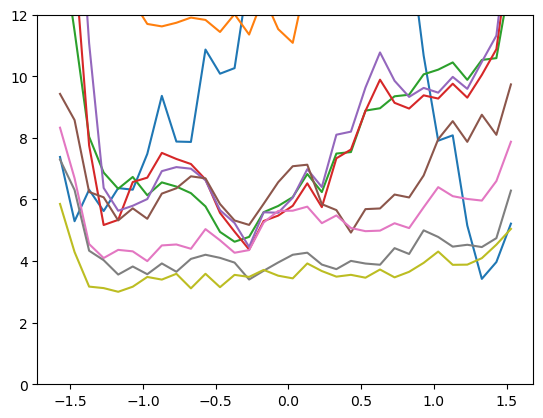

In [18]:
plt.plot(pivot_q0.index, pivot_q0.abs_q0_error)#, label="Joint 0 Error")
#plt.plot(pivot_q0.index, pivot_q0.abs_q3_error, label="Joint 3 Error")
#plt.legend()
plt.ylim(0,12)

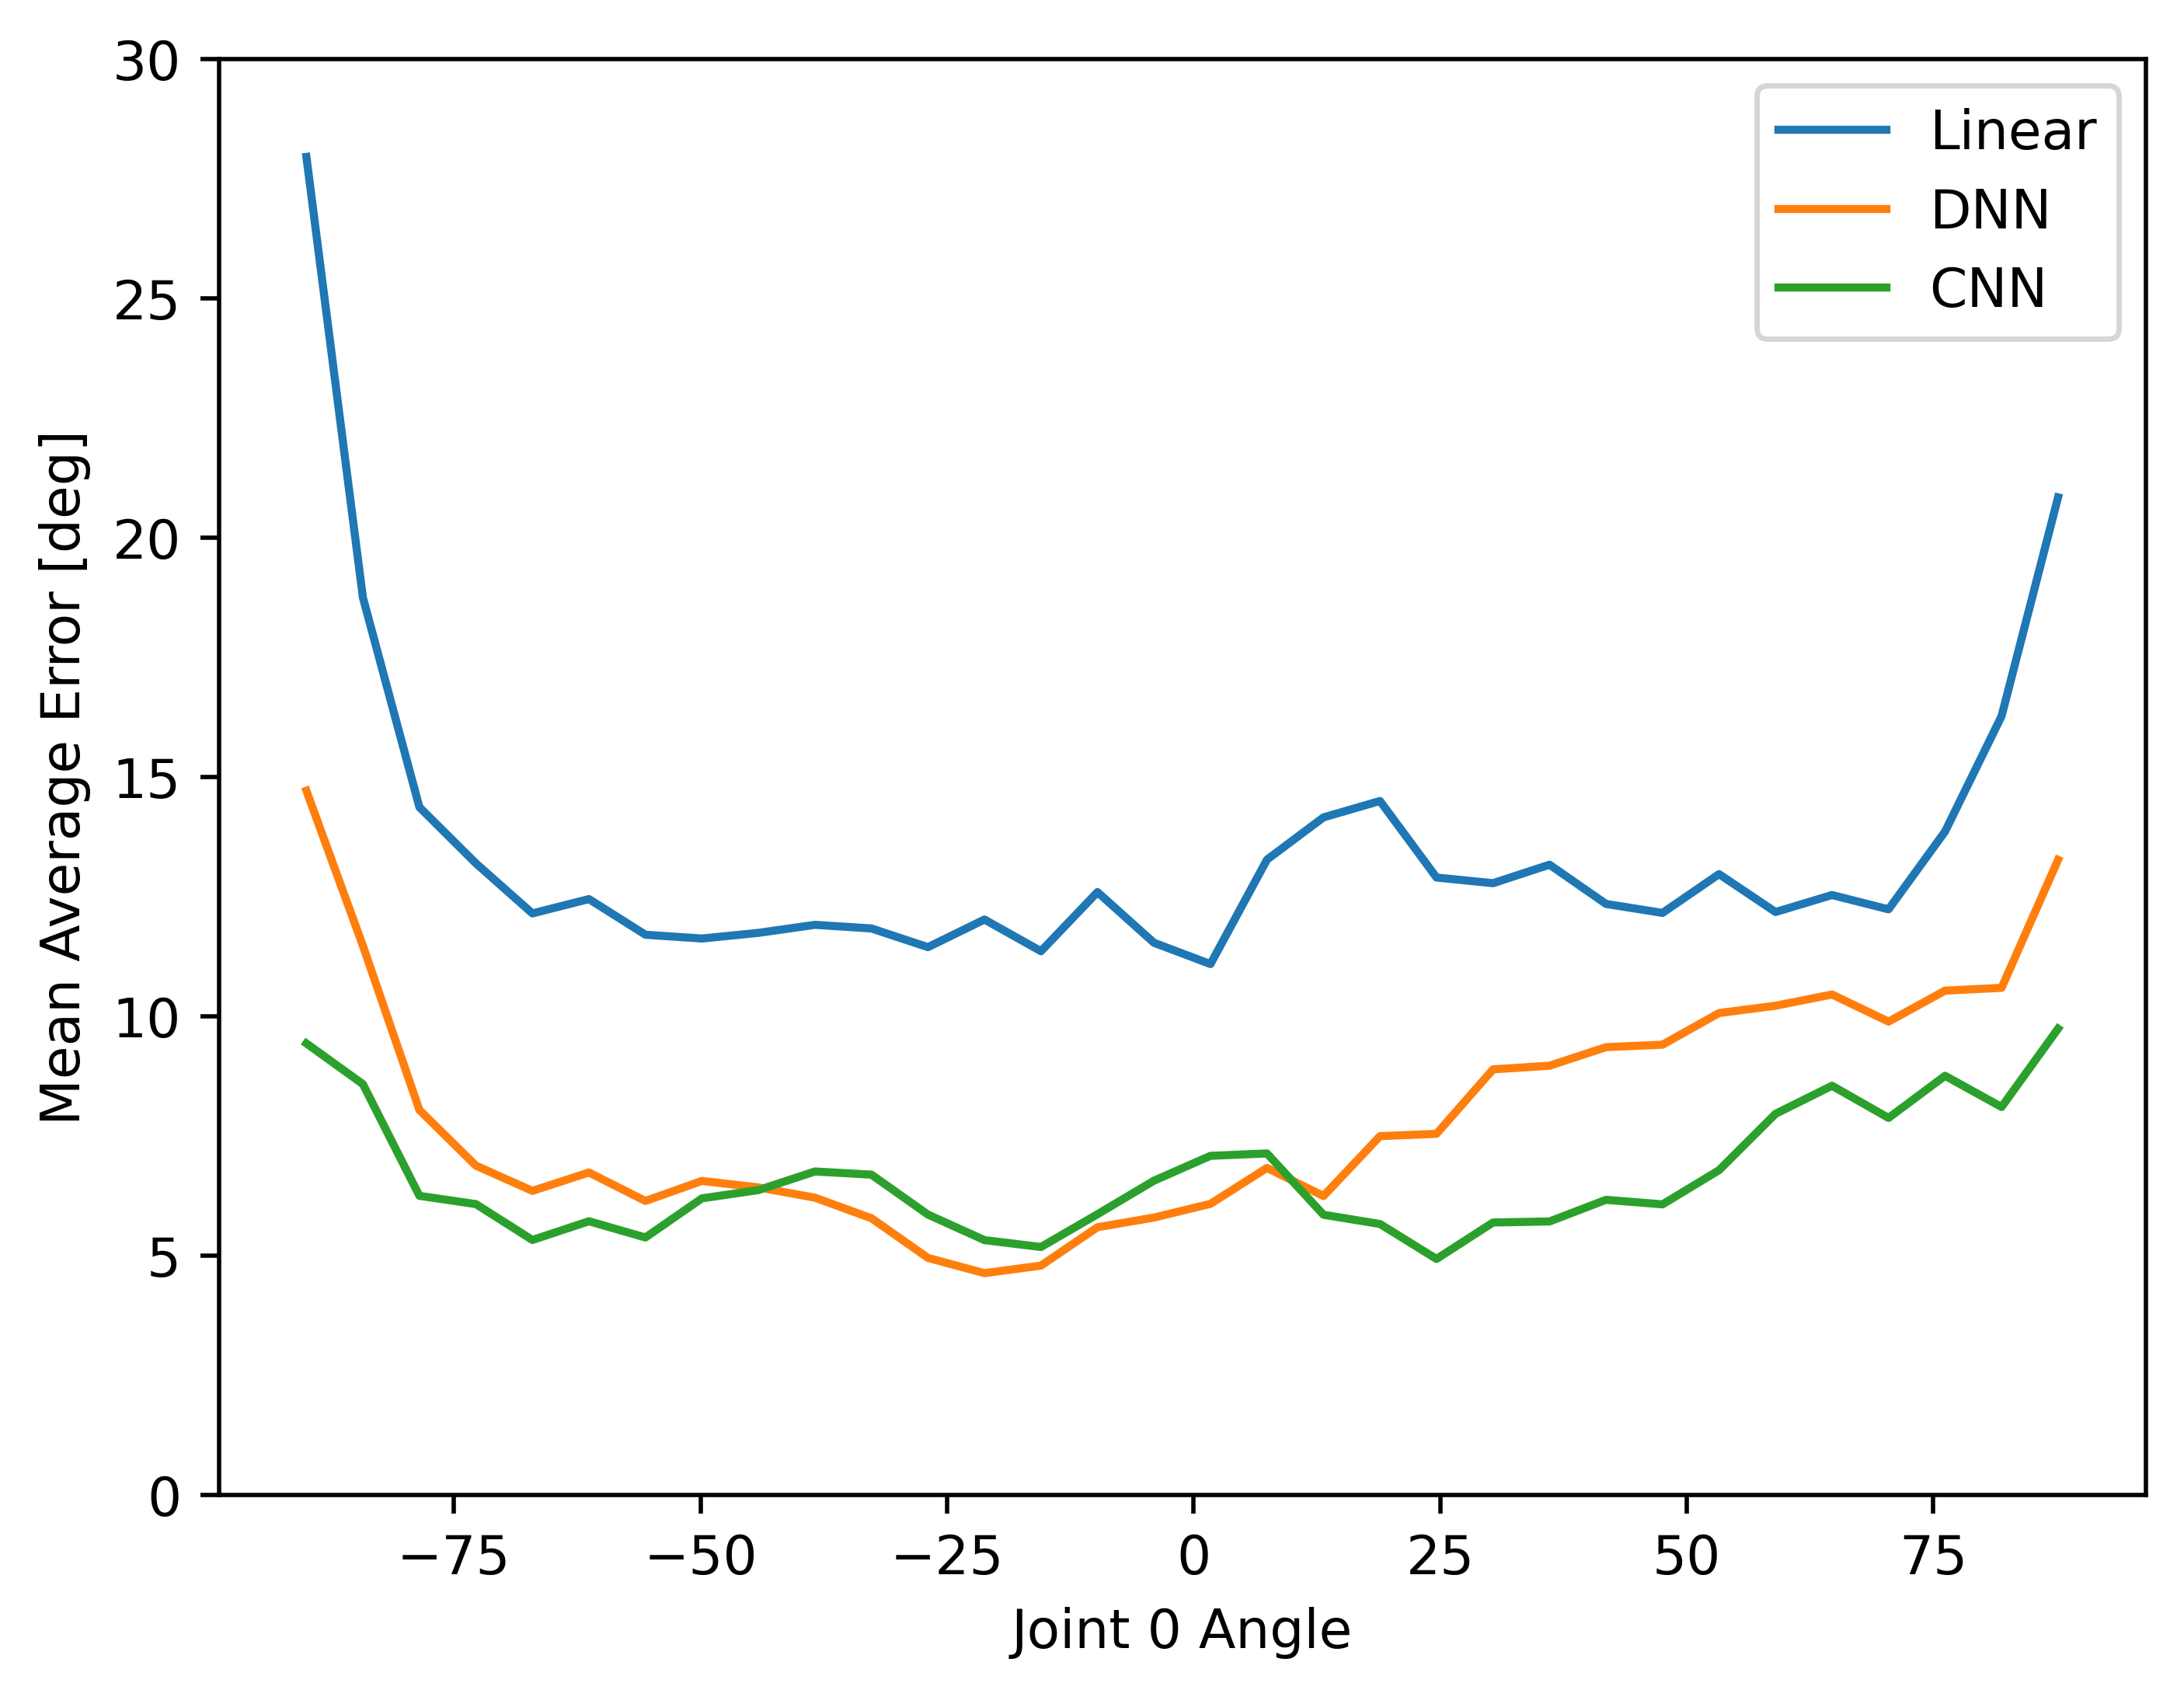

In [45]:
#plt.plot(np.rad2deg(pivot_q0.index), pivot_q0[("abs_q0_error", 0)], label="kNN")
plt.plot(np.rad2deg(pivot_q0.index), pivot_q0[("abs_q0_error", 1)], label="Linear")
plt.plot(np.rad2deg(pivot_q0.index), pivot_q0[("abs_q0_error", 2)], label="DNN")
plt.plot(np.rad2deg(pivot_q0.index), pivot_q0[("abs_q0_error", 5)], label="CNN")
plt.legend()
plt.ylim(0,30)
plt.ylabel("Mean Average Error [deg]")
plt.xlabel("Joint 0 Angle")
plt.gcf().set_dpi(500)

(0.0, 10.0)

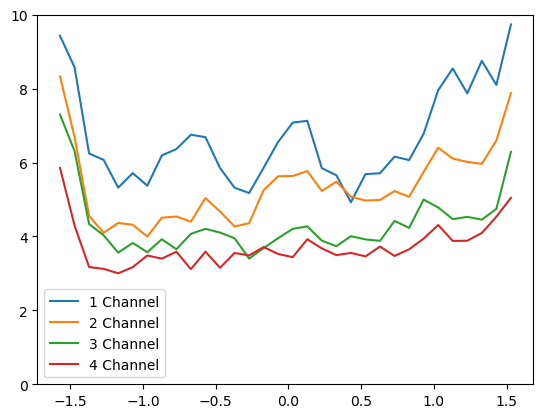

In [20]:
plt.plot(pivot_q0.index, pivot_q0[("abs_q0_error", 5)], label="1 Channel")
plt.plot(pivot_q0.index, pivot_q0[("abs_q0_error", 6)], label="2 Channel")
plt.plot(pivot_q0.index, pivot_q0[("abs_q0_error", 7)], label="3 Channel")
plt.plot(pivot_q0.index, pivot_q0[("abs_q0_error", 8)], label="4 Channel")
plt.legend()
plt.ylim(0,10)

Text(0, 0.5, 'MEan Absolut Error')

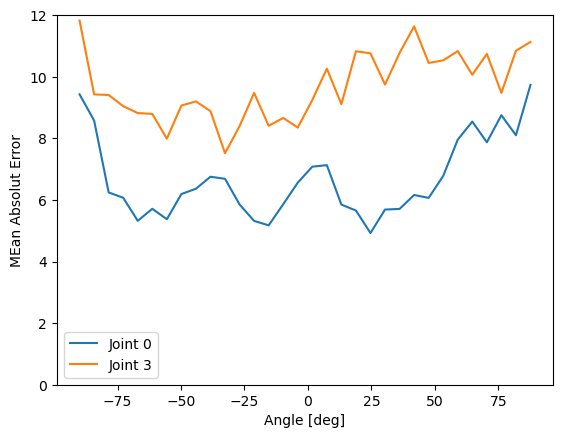

In [21]:
plt.plot(np.rad2deg(pivot_q0.index), pivot_q0[("abs_q0_error", 5)], label="Joint 0")
plt.plot(np.rad2deg(pivot_q0.index), pivot_q0[("abs_q3_error", 5)], label="Joint 3")
plt.ylim(0,12)
plt.legend()
plt.xlabel("Angle [deg]")
plt.ylabel("MEan Absolut Error")

In [22]:
pivot_q3 = pd.pivot_table(raw_data, columns="model_id", values = ["pred_q0","abs_q0_error","abs_q3_error","error"], index="true_q3", aggfunc="mean")
pivot_q3

abs_q0_error                                                        \
model_id            0          1          2          3          4         5   
true_q3                                                                       
-2.8        14.791975  15.526690   9.777691  10.196620  11.193729  8.739898   
-2.7        15.288847  15.875350   9.607461  10.316150  11.406656  8.747984   
-2.6        14.652393  13.639560   8.680215   8.704935   9.602477  7.471796   
-2.5        14.537078  14.924056   8.950545   9.321620  10.372246  7.779700   
-2.4        15.825413  13.106806   8.333507   8.493635   9.305840  7.814793   
-2.3        14.020550  15.060259  10.045152  10.797068  11.803372  7.025079   
-2.2         7.387600  14.562389  10.043083  10.120315  10.467782  7.548304   
-2.1         7.166732  13.312787   6.895937   7.091083   7.925822  5.934036   
-2.0         7.248281  13.516242   7.722484   8.027794   8.903683  5.851547   
-1.9         7.282681  12.950273   6.715528   7.115245   7.851692  5.643481   
-1.8         7.777620  12.103630   6.826647   7.124932   7.783878  6.323367   
-1.7         8.243229  12.597041   6.975113   7.049018   7.629223  5.950844   
-1.6         7.926525  12.411240   7.171000   7.386715   7.958091  6.013410   
-1.5         8.865235  12.799715   7.387452   7.463085   8.000293  5.774558   
-1.4         8.154211  11.934530   6.982751   7.058667   7.604412  6.070582   
-1.3         8.457206  12.116404   7.261458   7.130202   7.586816  5.850489   
-1.2         8.195186  13.172390   6.806205   6.740325   7.195748  5.776173   
-1.1         7.390781  12.268514   6.881936   6.606414   6.958324  5.787172   
-1.0         7.774952  13.078283   7.436462   7.476849   7.994614  6.007238   
-0.9         9.434111  12.326156   6.801571   6.594024   6.903648  5.905737   
-0.8        10.033861  13.138319   7.147989   7.210665   7.667091  5.880527   
-0.7        11.162669  13.609806   7.777782   7.820179   8.005596  6.525116   
-0.6        11.748446  13.806146   7.991754   8.302043   8.753691  6.576036   
-0.5        11.705170  14.341753   8.382041   8.574959   8.788515  6.468889   
-0.4        12.924620  14.310111   8.951740   9.002801   9.411716  7.138258   
-0.3        16.460581  15.529143  10.800242  10.657087  10.834433  8.681118   

                                       abs_q3_error  ...      error   pred_q0  \
model_id         6         7         8            0  ...          8         0   
true_q3                                              ...                        
-2.8      6.725298  5.853631  4.658426    16.894746  ...   8.331932  0.057590   
-2.7      6.192881  5.514290  5.043643    10.976878  ...   7.801128  0.071320   
-2.6      7.021705  5.182399  4.530199     6.532412  ...   7.104851  0.042706   
-2.5      6.264219  5.173795  4.606211    10.154984  ...   7.244225  0.072162   
-2.4      6.098702  4.806001  4.062533    11.075644  ...   7.482847  0.020762   
-2.3      6.202123  5.011076  4.205224    38.227792  ...   9.349274 -0.077534   
-2.2      6.357904  5.774482  4.273196    38.321751  ...  11.469555 -0.024643   
-2.1      4.348318  3.847606  3.402658    32.923125  ...   9.496097 -0.056249   
-2.0      4.728198  3.888257  3.434926    27.506595  ...   8.150934 -0.044252   
-1.9      4.473421  3.756939  3.472861    23.843033  ...   7.673641 -0.099541   
-1.8      4.811842  4.077270  3.478071    21.346143  ...   8.267120 -0.041028   
-1.7      4.615109  3.832861  3.199067    19.525039  ...   9.080035 -0.060271   
-1.6      4.550342  3.827972  3.322596    21.002484  ...   8.945382 -0.041722   
-1.5      4.912705  4.079689  3.445265    16.778076  ...   8.045993 -0.078131   
-1.4      4.703721  3.766926  3.460067    12.595253  ...   7.823269 -0.043065   
-1.3      4.716785  3.385604  3.329891     8.540652  ...   7.110858 -0.060995   
-1.2      4.407871  3.581650  3.063038     7.732042  ...   6.946879 -0.024505   
-1.1      4.588613  3.680715  3.149220     6.123486  ...   7.205177 -0.036867   
-1.0      4.5006

(-10.0, -170.0)

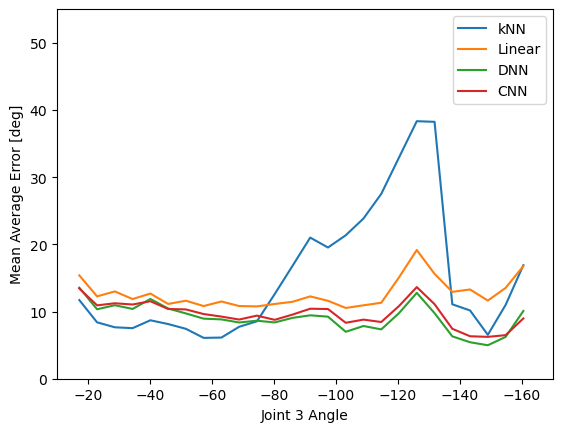

In [47]:
plt.plot(np.rad2deg(pivot_q3.index), pivot_q3[("abs_q3_error", 0)], label="kNN")
plt.plot(np.rad2deg(pivot_q3.index), pivot_q3[("abs_q3_error", 1)], label="Linear")
plt.plot(np.rad2deg(pivot_q3.index), pivot_q3[("abs_q3_error", 2)], label="DNN")
plt.plot(np.rad2deg(pivot_q3.index), pivot_q3[("abs_q3_error", 5)], label="CNN")
plt.legend()
plt.ylim(0,55)
plt.ylabel("Mean Average Error [deg]")
plt.xlabel("Joint 3 Angle")
plt.xlim(-10,-170)

In [50]:
pivot_q3_std = pd.pivot_table(raw_data, columns="model_id", values = ["pred_q0","abs_q0_error","abs_q3_error","error"], index="true_q3", aggfunc=np.std)


/tmp/ipykernel_4687/3174070078.py:1: FutureWarning: The provided callable <function std at 0x7fb3340bd9e0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pivot_q3_std = pd.pivot_table(raw_data, columns="model_id", values = ["pred_q0","abs_q0_error","abs_q3_error","error"], index="true_q3", aggfunc=np.std)


In [53]:
pivot_q3_std = pd.pivot_table(raw_data, columns="model_id", values = ["pred_q0","abs_q0_error","abs_q3_error","error"], index=["cleaned_q0","true_q3"], aggfunc=np.std)


/tmp/ipykernel_4687/3977510064.py:1: FutureWarning: The provided callable <function std at 0x7fb3340bd9e0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pivot_q3_std = pd.pivot_table(raw_data, columns="model_id", values = ["pred_q0","abs_q0_error","abs_q3_error","error"], index=["cleaned_q0","true_q3"], aggfunc=np.std)


(-10.0, -170.0)

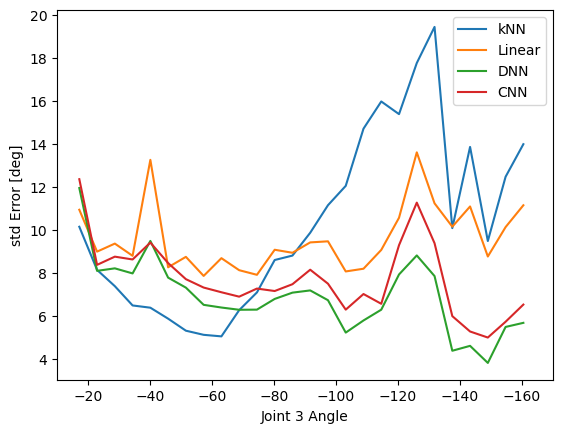

In [52]:
plt.plot(np.rad2deg(pivot_q3_std.index), pivot_q3_std[("abs_q3_error", 0)], label="kNN")
plt.plot(np.rad2deg(pivot_q3_std.index), pivot_q3_std[("abs_q3_error", 1)], label="Linear")
plt.plot(np.rad2deg(pivot_q3_std.index), pivot_q3_std[("abs_q3_error", 2)], label="DNN")
plt.plot(np.rad2deg(pivot_q3_std.index), pivot_q3_std[("abs_q3_error", 5)], label="CNN")
plt.legend()
#plt.ylim(0,55)
plt.ylabel("std Error [deg]")
plt.xlabel("Joint 3 Angle")
plt.xlim(-10,-170)

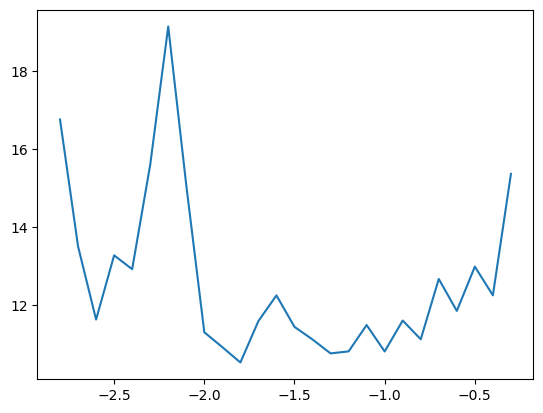

In [ ]:
np.argmax(pivot_q3[("abs_q3_error", 1)])

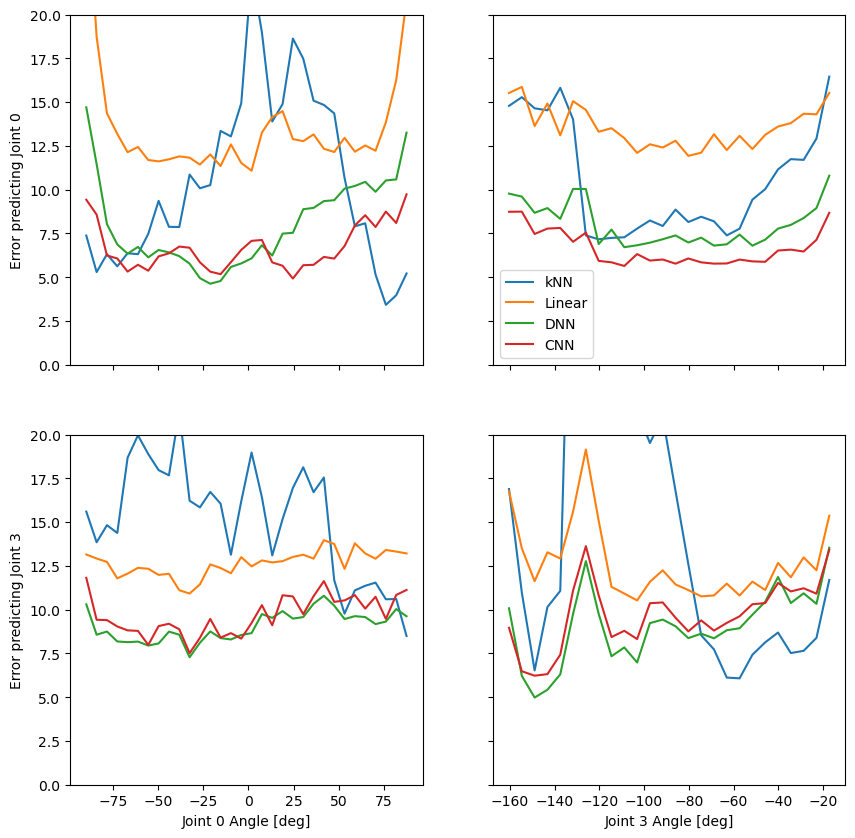

In [24]:
fig, axs = plt.subplots(2,2, sharex="col", sharey=True, figsize=(10,10))

for j, piv in enumerate((pivot_q0, pivot_q3)):
    for i, err in enumerate(("abs_q0_error", "abs_q3_error")):
        axs[i,j].plot(np.rad2deg(piv.index), piv[(err, 0)], label="kNN")
        axs[i,j].plot(np.rad2deg(piv.index), piv[(err, 1)], label="Linear")
        axs[i,j].plot(np.rad2deg(piv.index), piv[(err, 2)], label="DNN")
        axs[i,j].plot(np.rad2deg(piv.index), piv[(err, 5)], label="CNN")
axs[0,0].set_ylabel("Error predicting Joint 0")
axs[1,0].set_ylabel("Error predicting Joint 3")
axs[1,0].set_xlabel("Joint 0 Angle [deg]")
axs[1,1].set_xlabel("Joint 3 Angle [deg]")
axs[0,0].set_ylim(0,20)
axs[0,1].legend()